<a href="https://colab.research.google.com/github/dolmani38/drift/blob/main/%EB%85%BC%EB%AC%B8%20%EB%8C%80%EC%9D%91_0106.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concept drift로 인한 모델 성능 저하의 정량적 추정 방법 <br>

Quantitative performance estimation method for model performance degradation due to concept drift

# 1. Introduction

*   기계학습은 Trainset에 의해 모델을 구축한 후, Testset을 사용하여 성능을 측정한다.
*   통상, 측정된 성능값은 해당 모델을 대변하는 성능 지표가 된다.
*   이렇게 구축된 모델은 live data (online data)를 입력해서 실 활용하게 되는데, 이때 초기에 측정한 성능을 지속하여 확보하고 있는지 운영 중에 성능을 실측하여 관리하기는 업무적으로 특수한 case 제외하고 매우 어렵다.
*   시계열 Regression의 경우, 예측 기간의 도래 이후, 실측 Y값을 알 수 있으나 역시 업무에 따라 그 시간 간격이 크게 발생 할 수 있으며, classification의 경우, 예측 class가 정확한지 실측하기 위해서는 live data에 대해 별도의 labeling 작업을 해야 한다.
*   이러한 이유로 실제 운영 중 모델 성능 관리가 간과되고 있으며, 이로 인해 경영상의 문제를 초래 할 수 있다.
*   이상의 이슈를 극복하기 위해, concept drift의 통계량을 측정하여 모델의 성능 상태를 유추하는 연구들이 이루어져 왔지만, concept drift의 측정값 (통계량)을 통해 직접적으로 성능을 예측하는 연구는 희박하다.
*   이번 연구에서는 concept drift의 측정값 (통계량)을 통해 직접적으로 precision 성능을 예측하는 성능 예측 모델(PPM, Performance prediction model)을 제안한다. 
* 이를 통해, 실제 비즈니스 환경에서 live data (online data)의 drift 상태를 통해 현재 모델의 성능을 정량적으로 추정하고 직관적인 모델 성능 관리가 이루어 질 수 있도록 한다.












# 2. 이론적 배경

* LaTex  :https://deep.chulgil.me/ibmunjareul-wihan-gico/ 
* https://www.cmor-faculty.rice.edu/~heinken/latex/symbols.pdf

* Trainset으로 모델을 학습한 이후, 시간이 경과하면, live data는 어떠한 사회, 문화, 환경적 요인에 의해 그 특성과 분포가 변화하게 된다.
* 이때문에 학습 시점의 모델 성능을 유지할 수 없게된다.
* 학습이후 이러한 현상은 Data Drift, Concept Drift로 설명할 수 있으나, 이를 학습시점의 상황으로 보면, Trainset과 Testset의 Distribution이 상이한 Covariate shift (Geeta Dharani. Y; Nimisha G Nair; Pallavi Satpathy; Jabez Christopher "Covariate Shift: A Review and Analysis on Classifiers", 2019 Global Conference for Advancement in Technology (GCAT))의 상황으로 설명할 수 있다.
* 따라서, Covariate Shift 상황의 학습 방법에 대한 연구들을 통해, 모델 성능 추정 방법을 도출하고자 한다.

* (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.427.8969&rep=rep1&type=pdf)

* covariate shift의 문제에서 먼저, Trainset을 다음과 같이 정의한다.  
$$
X_L = \{x_1, . . . , x_m\}, Y_L = \{y_1, . . . , y_m\}
\tag{1}
$$
이때 x의 distribution, 즉 trainset의 distribution을 p(x|λ) 이라 한다.
* 이제, covariate shift 상황의 Testset을 다음과 같이 정의한다.
$$ 
X_T = \{x_{m+1}, . . . , x_{m+n}\}, Y_T = \{y_{m+1}, . . . , y_{m+n}\}
\tag{2}
$$
* 위의 testset의 distribution을 p(x|θ) 이라 한다.
* (Hidetoshi Shimodaira, "Improving predictive inference under covariate shift by weighting the log-likelihood function", Journal of Statistical Planning and Inference 90 (2000) 227–244)에 의하면 위의 조건에 대한 covariate shift의 학습은 아래의 식을 성립한다.

$$
E_{(x,y)\simθ}[l(f(x),y)] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)} l(f(x),y)]
\tag{3}
$$
* 식(3)에서 l(f(x),y)은 모델 f(x)의 loss function을 의미한다.
* 식(3)은 loss 의 scale조정에 의해 covariate shift을 보정할 수 있는 관계식이다.
* 식(3)을 Drift 상황으로 일반화 해서 성능 관계식으로 바꾼다.  
* f(x)를 일반적인 수치예측 (regression)이라 가정하면
$$
l_{squared}(f(x),y) = (y − f(x))^2
\tag{4}
$$
* 식(3)에 식(4)를 대입하여 정리하면,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}(y − f(x))^2]
\tag{5}
$$
* 여기서 Expactaion의 연산 정리(https://blog.naver.com/mykepzzang/220837877074)에 의해 E(XY)=E(X)E(Y)를 대입하여
$$
E_{(x,y)\simθ}[(y − f(x))^2] = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]E_{(x,y)\simλ}[(y − f(x))^2]
\tag{6}
$$
와 같이 나타낼 수 있으며,
$$
E_{(x,y)\simθ}[(y − f(x))^2] = Testset의 MSE(Mean Square Error)
$$
이고
$$
E_{(x,y)\simλ}[(y − f(x))^2] = Trainset의 MSE(Mean Square Error)
$$
이기 때문에, 
* 식(6)을 정리하면,
$$
MSE_{testset} = E_{(x,y)\simλ}[\dfrac{p(x|θ)}{p(x|λ)}]MSE_{trainset}  
\tag{7}
$$ 
* 식(7)을 통해, testset(live data)의 성능은 trainset의 성능(최초 측정 성능)과 trainset, testset의 distribution의 관계식이 성립함을 알 수 있다.


# 3. Proposed Method

## pseudo code

--------------------------------------------------------------------------------
**Step1 : performance modeling**

--------------------------------------------------------------------------------
&nbsp;&nbsp;1:&nbsp;&nbsp;$L_{trainset} =  \{ Y_L, X_L\} $ #이하 간략히 $L$ 로 표기 <br>

&nbsp;&nbsp;2:&nbsp;&nbsp;$L_{testset} =  \{ Y_T, X_T\} $<br>
&nbsp;&nbsp;3:&nbsp;&nbsp;$f(x,L) = train(Y_L, X_L)$ <br>
&nbsp;&nbsp;4:&nbsp;&nbsp;$base\_score = score(f(X_T,L),Y_T)$<br>
&nbsp;&nbsp;5:&nbsp;&nbsp;$For$ number_of_sample $do $<br>
&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_L, X_L, sampling\_ratio)$<br>
&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$X_b = noise\_injection(X_b,noise\_intensity)$<br>
&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
10:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift\_array \leftarrow drift$ <br>
11:&nbsp;&nbsp;$end$ <br>
12:&nbsp;&nbsp;$ppm(d) = train(\Delta score\_array, drift\_array)$

--------------------------------------------------------------------------------
**Step2 : adjust scale**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$For$ number_of_sample $do$<br>
2:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$Y_b, X_b = block\_sampling(Y_T, X_T, sampling\_ratio)$<br>
3:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_b)$<br>
4:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{predicted} \leftarrow ppm(drift)$<br>
5:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\Delta score\_array_{real} \leftarrow (base\_score - score(f(X_b,L),Y_b))$<br>
6:&nbsp;&nbsp;$end$<br>
7:&nbsp;&nbsp;$adjusted\_scale = \dfrac{var(\Delta score\_array_{real})}{var(\Delta score\_array_{predicted})}$

--------------------------------------------------------------------------------
**Step3 : apply perfomance_model**

--------------------------------------------------------------------------------

1:&nbsp;&nbsp;$l_{Input\_live\_data} =\{ X_l\}$ # live data에는 Y가 존재하지 않는다.<br>
2:&nbsp;&nbsp;$drift = adjusted\_ks\_test(X_L, X_l)$ <br>
3:&nbsp;&nbsp;$score_{predicted} = base\_score - adjusted\_scale * ppm(drift)$

* block sampling 에 대하서는 https://github.com/dolmani38/drift/blob/main/drift_sampling_0813.ipynb 참고!

## 설명

성능 예측 대상의 모델을 $f(x,L)$이라 할 때,

trainset과 testset은 $f(x,L)$의 학습 및 성능 측정을 위해 활용된 데이터에 해당.<br>
testset을 통하여 $f(x,L)$의 성능, base_score이 측정되었다.

<b>Step1 : 성능 모델링 단계</b> <br>
1. trainset에 대하여 random size로 블럭 샘플링 (block sampling)을 한다.
2. 샘플링된 $X_b$의 일부에 Noise를 주입하여 drift를 유도한다.
3. trainset($X_L$)과 drift유도된 Sample($X_b$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량(Kolmogorov–Smirnov statistic)을 취득한다.
4. 이때, 변경된 KS Test는 기존의 KS Test의 식(8)에서 식(9)와 같이 변경하여 적용한다.

$$
\begin{align}
D_n = {sup}_x |F_n(x) - F(x)|
\tag{8}
\end{align}
$$

$$
\begin{align}
D_n = {sup}_x (F_n(x) - F(x))
\tag{9}
\end{align}
$$

5. 식(9)와 같이 절대값를 제거하므로 성능에 대한 drift 통계량의 설명력을 높인다.
6. drift유도된 Sample에 대하여 $f(x,L)$의 성능편차($\Delta score$)를 $\Delta score\_array$에 저장한다.
7. drift통계량을 $drift\_array$에 저장한다.
8. 1~7까지의 과정을 반복하여 drift에 대한 성능 편차 dataset를 생성한다.
9. drift에 대한 성능 편차 dataset을 통해, $ppm(d)$ 을 학습한다.


<b>Step2 : scale 조정 단계 </b><br>
Step1에서 $X_b$의 일부를 임의 치환하여 drift를 유도하였으므로 drift에 의한 성능 편차($\Delta score$)는 실제 drift에서 발생하는 편차와 scale이 다를 수 있다. 이를 조정하기 위해 testset을 통해, 그 Scale을 측정한다.
1. testset($Y_T,X_T$)에 대하여 random size로 블럭 샘플링(block sampling)을 한다.
2. trainset과 testset에서 추출된 Sample에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift 통계량을 취득한다.
3. Step1에서 학습된 $ppm(d)$을 통해, 예측 성능 편차($\Delta score_{predicted}$)를 구하여 $\Delta score\_array_{predicted}$에  저장한다.
4. testset에서 추출된 Sample($Y_b,X_b$)에 대해 $f(x,L)$의 실 성능 편차($\Delta score_{real}$)를 구하여 $\Delta score\_array_{real}$에 저장한다.
5. 1~4의 과정을 반복하여 예측 성능 편차 dataset과 실 성능 편차 dataset을 생성한다.
6. 예측 성능 편차 dataset과 실 성능 편차 dataset의 분산을 비교하여 보정 Scale 값을 구한다.

<b>Step3 : $ppm(d)$의 적용 단계</b><br>
1. 일정기간 축적한 실 dataset ($X_l$)를 취득한다.
2. trainset($X_L$)과 실 dataset ($X_l$)에 대해 변경된 Kolmogorov–Smirnov test를 하여, drift통계량을 취득한다.
3. $ppm(d)$을 통해 예측 성능 편차($\Delta score _{predicted}$)를 구하고 보정 Scale 값을 곱한 후 base_score 에서 빼서 예측 성능값($score_{predicted}$)을 구한다. 


# 4. 실험 계획

*   Data
1. Personal Loan Data
> 미국의 개인 대출 기업 ‘Lending Club’의 공개 데이터 사용<BR>
> 2007~2017년까지 총 2,260,701건의 데이터, 대출 건당 실제 ‘default’ 여부 포함
151개 Column<BR>
> 데이터 정제 후, 81개 Features, 120만건 사용<BR>
>> trainset : 11,497건 (2010년)<BR>
>> online dataset : 1,268,183건 (2011~2017년)<BR>

2. Credit Card Transaction Data
> This data has more than 20 million transactions generated from a multi-agent virtual world simulation performed by IBM. 
> The data covers 2000 (synthetic) consumers resident in the United States, but who travel the world. 
> The data also covers decades of purchases, and includes multiple cards from many of the consumers. 
>> trainset : 37,301건 (2007년, 1/30 축소)<BR>
>> online dataset : 90,836건 (2008~2009년, 1/30 축소)<BR>

* 예측 알고리즘
> Random-forest for Personal Loan Data<BR>
> Catboost for Credit Card Transaction Data

* 성능 예측 알고리즘
> Ordinary Least Squares regression

* 실험의 변수
> feature_count (order of importance)<br>
> sampling_ratio (size) = 0.05 ~ 0.95, 0.20 ~ 0.80, 0.40 ~ 0.60<BR>
> stdev_ratio = 1, 2, 3<BR>

* 측정 지표
> 예측 알고리즘의 성능 지표 : precision<BR>
> PPM의 성능 지표<BR>
    >>mean_absolute_error<br>
    >>root_mean_square_error<br>
    >>mean_absolute_percentage_error<br>
    >>R_square<br>


# 5. 실험을 위한 기본 준비 

In [1]:
if True:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import random
np.random.seed(1337)

In [3]:
def seed_everything(seed: int = 46):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    

# 6. Main 알고리즘 (Performance predit model) 구현 class

In [64]:
# https://towardsdatascience.com/comparing-sample-distributions-with-the-kolmogorov-smirnov-ks-test-a2292ad6fee5

from scipy import stats
import sys
import math
if sys.version_info >= (3, 5):
    from math import gcd
else:
    from fractions import gcd

from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm # import statsmodels 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
import random
from statistics import mean
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

class MPP:
    def __init__(self,predict,column_names,importances ,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False):
        self.predict = predict
        self.scaler = scaler
        self.y_ref = y_ref
        self.x_ref = x_ref
        self.y_inf = y_inf
        self.x_inf = x_inf
        self.COLUMNS = column_names
        self.verbose = verbose
        importances = importances/sum(importances)

        self.l = []
        for x,(c,i) in enumerate(zip(column_names,importances)):
            self.l.append((c,i,x))
        self.l.sort(key = lambda x: x[1],reverse=True) 

        self.df_stat = pd.DataFrame({"mean":np.mean(x_ref,axis=0),"std":np.std(x_ref,axis=0)},index=column_names)

    def split_sample(self,yy,xx,train_size = 0.7, middle_offset = False):
        size = xx.shape[0]
        offset = int(size*train_size)
        mo = 0
        if middle_offset:
            mo = int(random.random() * (size - offset))
            #print(mo)

        x_ref1 = xx[mo:mo+offset]
        y_ref1 = yy[mo:mo+offset]
        x_inf1 = np.concatenate([xx[0:mo], xx[mo+offset:]], axis=0)
        y_inf1 = np.concatenate([yy[0:mo],yy[mo+offset:]], axis=0)

        return y_ref1,x_ref1,y_inf1,x_inf1 

    def __ks_2samp2(self,sample1, sample2):
        # Gets all observations
        sample1 = np.sort(sample1)
        sample2 = np.sort(sample2)
        n1 = sample1.shape[0]
        n2 = sample2.shape[0]   
        data_all = np.concatenate([sample1, sample2])
        cdf1 = np.searchsorted(sample1, data_all, side='right') / n1
        cdf2 = np.searchsorted(sample2, data_all, side='right') / n2
        # Evaluates the KS statistic
        cddiffs = cdf1 - cdf2
        minS = -np.min(cddiffs)
        maxS = np.max(cddiffs)
        ks_stat =  max(minS, maxS)
        
        if ks_stat == minS:
            ks_stat = -ks_stat
        
        # Calculates the P-Value based on the two-sided test
        # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
        m, n = float(n1), float(n2)
        en = m * n / (m + n)
        p_value = 0.0 #stats.kstwobign.sf(math.sqrt(en) * abs(ks_stat))
        #p_value = stats.kstwobign.sf(en * abs(ks_stat))
        return ks_stat,p_value
    
    def __ks_drift(self,ref_x,inf_x):
        x_drift = np.zeros((ref_x.shape[1],2))
        for i in range(ref_x.shape[1]):
            #s, p = ks_2samp(ref_x[:,i],inf_x[:,i],mode='asymp')
            s, p = self.__ks_2samp2(ref_x[:,i],inf_x[:,i])
            x_drift[i,0] = s
            x_drift[i,1] = p
        return x_drift

    def __getImportanceColumnNameTop(self,prefix="", top=5):
        return [prefix+w for w in np.asarray(self.l[0:top])[:,0]]

    def __getImportanceIndexTop(self,top=5):
        return [int(w) for w in np.asarray(self.l[0:top])[:,2]]    


    def drift_sampling(self,sampling_sigma=0.95,permutaion_sigma=1,epoch = 100,TOP=5):

        self.itc = self.__getImportanceColumnNameTop(prefix="",top=TOP)
        self.toplist = self.__getImportanceIndexTop(top=TOP)

        if self.verbose:
            print(self.itc)
            print("sampling_sigma:",sampling_sigma)
            print("permutaion_sigma:",permutaion_sigma)
        
        if self.scaler is not None:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(self.scaler.transform(x_inf)),average='binary')
        else:
            self.base_score = precision_recall_fscore_support(y_inf, self.predict(x_inf),average='binary')

        if self.verbose:
            print("base_score:",base_score)
        metric_a= []
        metric_b= []
        metric_c= []
        drift_data_ks_stats = []
        drift_data_ks_pvals = []
        drift_data_ks_stats_diff = []
        drift_data_ks_pvals_diff = []     
        raw_drift = []
        for i in range(epoch):
            #y_ref_d, _, x_ref_d, _ = train_test_split(y_ref, x_ref, train_size=0.10, random_state=i)
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_ref.copy(), self.x_ref.copy(), train_size=random.uniform(1-sampling_sigma,sampling_sigma),middle_offset = True)
            
            # before permutation
            o_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])

            if self.scaler is not None:
                acc1 = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc1 = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            #permutation for x_inf_d
            #for v in self.toplist:
            p1 = random.random()
            nums = np.random.choice([0, 1], size=x_inf_d.shape[0], p=[1-p1, p1])            
            v = random.choice(self.toplist)
            x_inf_d[:,v] = x_inf_d[:,v] + np.random.normal(0, self.df_stat['std'][v]*permutaion_sigma, x_inf_d.shape[0])*nums

            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            if acc[0] >0 and self.base_score[0] > acc[0]:
                x_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
                #sumo = np.sum((o_drift[:,0]))
                sumd = np.sum((x_drift[:,0]))
                #sump = np.sum(x_drift[:,1])
                raw_drift.append(o_drift[:,0])
                #drift_ratio2.append(x_drift[:,0])
                print(f"\r{i+1}/{epoch} acc:{acc[0]:.4f} {acc[1]:.4f} {acc[2]:.4f} sum:{sumd:.4f}", end="", flush=True)
                metric_a.append([acc[0]/self.base_score[0],acc[1]/self.base_score[1],acc[2]/self.base_score[2]])
                metric_b.append([(self.base_score[0] - acc[0]),(self.base_score[1] - acc[1]),(self.base_score[2] - acc[2])])
                metric_c.append([acc[0],acc[1],acc[2],acc1[0]])
                drift_data_ks_stats.append(x_drift[:,0])
                drift_data_ks_pvals.append(x_drift[:,1])
                #drift_data_ks_pvals.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) # x_drift[:,1])   
                #drift_data_ks_stats_diff.append(base_drift[:,0]*(1-base_drift[:,1]) - x_drift[:,0]*(1-x_drift[:,1]))
                drift_data_ks_pvals_diff.append([1 if a < 0.05 else 0 for a in x_drift[:,1]]) 

        metric_a = np.asarray(metric_a)
        metric_b = np.asarray(metric_b)
        metric_c = np.asarray(metric_c)        
        drift_data_ks_stats = np.asarray(drift_data_ks_stats)
        drift_data_ks_pvals = np.asarray(drift_data_ks_pvals)    
        drift_data_ks_stats_diff = np.asarray(drift_data_ks_stats_diff)
        drift_data_ks_pvals_diff = np.asarray(drift_data_ks_pvals_diff)


        # pericision의 distribution
        # plotting two histograms on the same axis
        alary = np.concatenate((metric_c[:,0],metric_c[:,3]))
        min = np.min(alary)
        max = np.max(alary)
        if self.verbose:
            plt.hist(metric_c[:,3], bins = 20, alpha=0.45, color='red',range=(min,max))
            plt.hist(metric_c[:,0], bins = 20, alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of pericision")
            plt.legend(['raw pericision','permuted pericision'])        
            plt.show()

        alary = np.concatenate((np.asarray(raw_drift)[:,0],drift_data_ks_stats[:,0]))
        min = np.min(alary)
        max = np.max(alary)
        if self.verbose:
            plt.hist(np.asarray(raw_drift)[:,0], bins = 20 , alpha=0.45, color='red',range=(min,max))
            plt.hist(drift_data_ks_stats[:,0], bins = 20 , alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of drift (most important feature)")
            plt.legend(['raw drift','permuted drift'])              
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(drift_data_ks_stats[:,0])
            plt.title("plot of drift (most important feature)")
            plt.show()

        """
        drift_ratio1 = np.asarray(drift_ratio1)
        drift_ratio2 = np.asarray(drift_ratio2)

        drift_ratio = []
        for s in range(len(toplist)):
            drift_ratio.append(sum(abs(drift_ratio2[:,s]))/sum(abs(drift_ratio1[:,s])))
        """
        return  metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,y_ref.shape[0]

    def build_performance_model(self,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff):
        dx = pd.DataFrame(drift_data_ks_stats*drift_data_ks_pvals_diff,columns=self.COLUMNS[self.toplist])
        #dx['intercept'] = 1
        #dx = trainset
        if self.verbose:
            print(dx.shape)

        self.model = sm.OLS(metric_c[:,0], dx).fit() ## sm.OLS(output, input)
        # Print out the statistics
        if self.verbose:
            print(self.model.summary())

    def __reject_outliers_2(self,data, m=1.64):
        data = np.asarray(data)
        mean = np.mean(data)
        if self.verbose:
            print("\nraw MDR",mean,len(data))
        standard_deviation = np.std(data)
        distance_from_mean = abs(data - mean)
        max_deviations = m
        not_outlier = distance_from_mean < max_deviations * standard_deviation
        no_outliers = data[not_outlier]
        if self.verbose:
            print(len(data))
        """
        stdev = np.std(data)
        mean = np.mean(data)
        maskMin = mean - stdev * m
        maskMax = mean + stdev * m
        mask = np.ma.masked_outside(data, maskMin, maskMax)
        #print('Masking values outside of {} and {}'.format(maskMin, maskMax))
        """
        return no_outliers

    def getMDR(self, zscore=0.7):
        drift_array = []
        real_array = []
        predicted_array = []
        acc_infs = []
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        if self.verbose:
            print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize        
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            #y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            #x_inf_d = self.x_inf[(i*step):(i*step)+ssize]
            y_inf_d, x_inf_d, _, _ = self.split_sample(self.y_inf.copy(), self.x_inf.copy(), train_size=random.uniform(0.05,0.95),middle_offset = True)
            
            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])

            dd = np.asarray(inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]).reshape(1,-1)
            # add intercept term
            #intc = np.ones((dd.shape[0],1))
            #dd = np.concatenate((dd,intc),axis=1)

            acc_delta = self.model.predict(dd)[0]

            if self.scaler is not None:
                acc_real = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc_real = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')

            # 실 precision / 예측 precision 
            acc_predict = self.base_score[0] - acc_delta
            precision_ratio = acc_real[0] / acc_predict
            #if delta > 0 and acc_inf > 0:
            acc_infs.append(precision_ratio)
            drift_array.append(inf_drift[:,0])
            real_array.append(acc_real[0])
            predicted_array.append(acc_predict)

            print(f"\r{i+1}/{epoch} drift1:{inf_drift[0,0]} real_acc:{acc_real[0]} predict_acc:{acc_predict} delta_ratio:{precision_ratio:.4f}", end="", flush=True)

        #acc_infs = self.__reject_outliers_2(acc_infs).mean()
        acc_infss = self.__reject_outliers_2(acc_infs,zscore)
        if self.verbose:
            plt.hist(acc_infss, bins = 20)
            plt.title("distribution of delta ratio for real delta precision vs predicted delta precision, remove outlier (50%)")
            plt.show()

        mdr = np.mean(acc_infss)
        #mdr = mean(acc_infs)
        if self.verbose:
            print("\nMDR:",mdr)
        
        real_var = real_array #self.__reject_outliers_2(real_array)
        real_dist = np.max(real_var) - np.min(real_var)

        pred_var = predicted_array #self.__reject_outliers_2(predicted_array)
        pred_dist = np.max(pred_var) - np.min(pred_var)
        pred_mean = np.mean(pred_var)
        delta_mean = np.mean(real_var) - pred_mean

        """
        real_dist = np.std(real_array)
        pred_dist = np.std(predicted_array)
        """
        dist_ratio = real_dist/pred_dist
        if self.model.params[0] < 0:
            dist_ratio = -dist_ratio
        if self.verbose:
            print(f"delta_mean:{delta_mean} pred_mean:{pred_mean} real_dist:{real_dist}, pred_dist{pred_dist}, dist_ratio:{dist_ratio}")

        alary = np.concatenate((real_array,predicted_array))
        min = np.min(alary)
        max = np.max(alary)

        if self.verbose:
            plt.hist(real_array, bins = 20, alpha=0.45, color='red',range=(min,max))
            plt.hist(predicted_array, bins = 20, alpha=0.45, color='blue',range=(min,max))
            plt.title("distribution of delta pericision")
            plt.legend(['real delta pericision','predicted delta pericision'])        
            plt.show()

            plt.hist(np.asarray(drift_array)[:,0], bins = 20)
            plt.title("distribution of drift (most important feature)")
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(real_array, color='red')
            plt.plot(predicted_array, color='blue')
            plt.title("plot of delta pericision")
            plt.legend(['real delta pericision','predicted delta pericision'])    
            plt.show()

            plt.figure(figsize=(20,5))
            plt.plot(np.asarray(drift_array)[:,0])
            plt.title("plot of drift (most important feature)")
            plt.show()

        return mdr, dist_ratio, delta_mean, pred_mean

    def build_second_performance_model(self):
        scnd_y = []
        scnd_x = []
        
        ssize = int(self.y_inf.shape[0] * 0.5)
        step=int(ssize/1000)
        if self.verbose:
            print("size,step:",ssize,step)
        epoch = 1000
        if step == 1:
            epoch = ssize
        for i in range(epoch):
            #y_inf_d,x_inf_d, _, _ = self.split_sample(self.y_inf, self.x_inf, train_size=0.5,middle_offset = True)
            if (i*step)+ssize >= self.y_inf.shape[0]:
                break
                
            y_inf_d = self.y_inf[(i*step):(i*step)+ssize]
            x_inf_d = self.x_inf[(i*step):(i*step)+ssize]

            inf_drift = self.__ks_drift(self.x_ref[:,self.toplist], x_inf_d[:,self.toplist])
            dd = inf_drift[:,0]*[1 if a < 0.05 else 0 for a in inf_drift[:,1]]
            acc_inf = self.model.predict(dd)[0]
            if self.scaler is not None:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(self.scaler.transform(x_inf_d)),average='binary')
            else:
                acc = precision_recall_fscore_support(y_inf_d, self.predict(x_inf_d),average='binary')
            
            scnd_x.append([acc_inf]) #+[d for d in dd])
            scnd_y.append(acc[0])
            print(f"\r{i+1}/{epoch} acc:{acc[0]} {acc_inf}", end="", flush=True)

        self.scnd_model = sm.OLS(scnd_y, np.asarray(scnd_x)).fit() ## sm.OLS(output, input)
        # Print out the statistics
        if self.verbose:
            print(self.scnd_model.summary())

    def predict_precision_for_PPM(self,y_test2,X_test2,mdr,dist_ratio,delta_mean, pred_mean, window_size = 10000,step = 500):

        df = {}

        drift_d = []
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []

        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]
            drift_d.append(X3_drift[:,0])
            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            # add intercept term
            #dd['intercept'] = 1

            #dd = drift_scaler.transform(dd)
            #acc_c = mean([m.predict(ss.transform(dd))[0][0] for m in  models]) #model_c.predict(dd)[0]
            #acc_c = mean([m.predict(dd)[0][0] for m in  models]) 

            #print(dd.values)
            #print(dd.values/drift_ratio)
            
            # predicted precision
            #acc_c = (self.base_score[0] - self.model.predict(dd.values)[0]*dist_ratio) * mdr
            pp = self.model.predict(dd.values)[0]
            acc_c = self.base_score[0] - dist_ratio*(pp + delta_mean)*4
            """
            if (acc_c - beta) > base_score[0]:
                beta = (acc_c - beta) - base_score[0]
            
            acc_c =  acc_c - beta
            
            if acc_c - beta > 0:
                beta = beta+ acc_c
            
            acc_c = base_score[0] + acc_c - beta
            """
            
            if beta == 0:
                beta = base_score[0] - acc_c

            acc_c = beta + acc_c
            if self.verbose:
                print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)
            
        
        if self.verbose:
            drift_df = pd.DataFrame(drift_d,columns=self.itc)
            drift_df.plot(title="ks-test statistics of features", legend=True,figsize=(20,5))

        df2 = pd.DataFrame(df)

        return df2


    def predict_precision_for_second_model(self,y_test2,X_test2,window_size = 10000,step = 500):

        df = {}
        df['The precision of the model on real data'] = []
        df['Predicted precision'] = []
        beta = 0
        #window_size = 10000
        #step = 500
        batch = math.ceil((X_test2.shape[0]-window_size)/step)
        for i in range(batch):
            ux = X_test2[i*step:i*step+window_size]
            uy = y_test2[i*step:i*step+window_size]
            if self.scaler is not None:
                f1 = precision_recall_fscore_support(uy, self.predict(self.scaler.transform(ux)),average='binary')
            else:
                f1 = precision_recall_fscore_support(uy, self.predict(ux),average='binary')

            X3_drift = self.__ks_drift(self.x_ref[:,self.toplist],ux[:,self.toplist])
            #X3_drift = mean_drift[top_list,0] - X3_drift[:,0]

            X3_drift = X3_drift[:,0] * [1 if a < 0.05 else 0 for a in X3_drift[:,1]] # *importances[top_list]
            #X3_drift = X3_drift[:,0] * (1-X3_drift[:,1]) *importances
            dd = pd.DataFrame(X3_drift.reshape(1,-1),columns=self.COLUMNS[self.toplist])
            
            acc_c = self.model.predict(dd.values)[0]
            #acc_c = self.scnd_model.predict(np.asarray([acc_c] + [d for d in dd.values[0,:]]).reshape(1,-1))[0]
            acc_c = self.scnd_model.predict(np.asarray([acc_c]).reshape(1,-1))[0]

            if beta == 0:
                beta = self.base_score[0] - acc_c
            acc_c = beta + acc_c

            if acc_c > self.base_score[0]:
                acc_c = self.base_score[0]
            if self.verbose:
                print(f"{f1[0]} - {acc_c}")
            df['The precision of the model on real data'].append(f1[0])
            df['Predicted precision'].append(acc_c)

        df2 = pd.DataFrame(df)

        return df2

    def result_statistics(self,df2):
        MAE = mean_absolute_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        MSE = mean_squared_error(df2['The precision of the model on real data'], df2['Predicted precision']) 
        MAPE = mean_absolute_percentage_error(df2['The precision of the model on real data'], df2['Predicted precision'])
        RMSE = np.sqrt(MSE)
        r_2 = r2_score(df2['The precision of the model on real data'], df2['Predicted precision']) 
        print('')
        print('MAE',MAE)
        print('RMSE',RMSE)
        print('MAPE',MAPE)
        print('R2',r_2)
        #display adjusted R-squared
        #adj_r2 = 1 - (1-r_2)*(df2.shape[0]-1)/(df2.shape[0]-80)
        #print('adj R2',adj_r2)
        return MAE,RMSE,MAPE,r_2        

# 7. loan predict 실험

## 데이터 구축

In [5]:
df_accepted = pd.read_csv("/content/drive/MyDrive/Drift/accepted_2007_to_2018Q4.csv")

print(df_accepted.shape)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(2260701, 151)


### 데이터 정제

In [6]:
# for the sake of simplicity, let's consider only Fully Paid and Charged Off values:

df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]

print(df_accepted.shape)

(1345310, 151)


In [7]:
cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(50).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 101)

In [8]:
# maybe we can go further, and eliminate columns up to title:

cols_to_drop = df_accepted.isnull().sum().sort_values(ascending=False).head(45).index
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1345310, 56)

In [9]:
# Remaining columns have missing data points, but they account for less than 0.2% of the total data. Let's remove the rows that are missing those values in those columns with dropna():

df_accepted = df_accepted.dropna()
df_accepted.shape

(1341026, 56)

In [10]:
# These are constant columns. We can drop it either.

cols_to_drop = ['out_prncp', 'out_prncp_inv', 'policy_code']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 53)

In [11]:
# It seems we have many "duplicated" information. Let's drop some columns, based on visual inspection at corr_pairs dataframe:

cols_to_drop = ['fico_range_low', 'funded_amnt_inv', 'funded_amnt', 'total_pymnt_inv', 'total_pymnt', 'installment', 'collection_recovery_fee', 'total_rec_prncp', 'last_fico_range_low']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

(1341026, 44)

In [12]:
values = df_accepted.loan_status.unique()
encode = [1,0]
d = dict(zip(values, encode))

df_accepted['loan_paid'] = df_accepted['loan_status'].map(d)

df_accepted = df_accepted.drop(columns=['loan_status'])


In [13]:
df_accepted

,id,loan_amnt,term,int_rate,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,loan_paid
0,68407277,3600.0,36 months,13.99,C,C4,MORTGAGE,55000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
1,68355089,24700.0,36 months,11.99,C,C1,MORTGAGE,65000.0,Not Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2,68341763,20000.0,60 months,10.78,B,B4,MORTGAGE,63000.0,Not Verified,Dec-2015,...,Joint App,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
4,68476807,10400.0,60 months,22.45,F,F1,MORTGAGE,104433.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
5,68426831,11950.0,36 months,13.44,C,C3,RENT,34000.0,Source Verified,Dec-2015,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,89905081,18000.0,60 months,9.49,B,B2,OWN,130000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260690,88948836,29400.0,60 months,13.99,C,C3,MORTGAGE,180792.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,1
2260691,89996426,32000.0,60 months,14.49,C,C4,MORTGAGE,157000.0,Source Verified,Oct-2016,...,Individual,0.0,0.0,0.0,0.0,0.0,N,Cash,N,0
2260692,90006534,16000.0,60 months,12.79,C,C1,RENT,150000.0,Not Verified,Oct-2016,...,Individual,0.0,0.0,0.0,3.0,0.0,N,Cash,N,1


In [14]:
# droping constant columns

print(df_accepted.pymnt_plan.value_counts())
print(df_accepted.hardship_flag.value_counts())

cols_to_drop = ['id', 'pymnt_plan', 'hardship_flag']
df_accepted = df_accepted.drop(columns=cols_to_drop)
df_accepted.shape

n    1341026
Name: pymnt_plan, dtype: int64
N    1341026
Name: hardship_flag, dtype: int64


(1341026, 41)

In [15]:
cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

print(df_accepted.term.value_counts())

# convert term into either a 36 or 60 integer numeric data type

l1 = df_accepted.term.unique()
l2 = [36, 60]
d = dict(zip(l1, l2))

df_accepted['term'] = df_accepted['term'].map(d)

# as grade is part of sub_grade, so let's just drop the grade feature.

df_accepted = df_accepted.drop(columns='grade')

df_accepted = pd.get_dummies(df_accepted, columns = ['sub_grade'], prefix='', prefix_sep='', drop_first=True)

cat_cols = df_accepted.select_dtypes(include=['object']).columns
print(cat_cols)

# for these columns, let's just create dummy variables, concatenate them with the original dataframe and drop original columns.

df_accepted = pd.get_dummies(df_accepted, columns = ['verification_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['application_type'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['initial_list_status'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['purpose'], prefix='', prefix_sep='', drop_first=True)

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'url', 'purpose', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
 36 months    1017398
 60 months     323628
Name: term, dtype: int64
Index(['home_ownership', 'verification_status', 'issue_d', 'url', 'purpose',
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [16]:
df_accepted.shape

(1341026, 86)

In [17]:
df_accepted['home_ownership'] = df_accepted.home_ownership.replace('NONE', 'ANY')
df_accepted = pd.get_dummies(df_accepted, columns = ['home_ownership'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=[ 'url', 'last_pymnt_d', 'last_credit_pull_d'])
df_accepted = df_accepted.drop(columns=['zip_code', 'addr_state'])
df_accepted = pd.get_dummies(df_accepted, columns = ['disbursement_method'], prefix='', prefix_sep='', drop_first=True)
df_accepted = pd.get_dummies(df_accepted, columns = ['debt_settlement_flag'], prefix='', prefix_sep='', drop_first=True)
df_accepted = df_accepted.drop(columns=['earliest_cr_line'])
df_accepted.shape

(1341026, 83)

In [18]:
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jan','01')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Feb','02')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Mar','03')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Apr','04')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('May','05')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jun','06')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Jul','07')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Aug','08')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Sep','09')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Oct','10')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Dec','11')
df_accepted['issue_d'] = df_accepted['issue_d'].str.replace('Nov','12')

In [19]:
def reorder_issue_d(dt):
    a = dt.split('-')
    return a[1]+a[0]

reorder_issue_d('01-2009')

'200901'

In [20]:
 df_accepted['issue_d'] = df_accepted['issue_d'].apply(reorder_issue_d)
 df_accepted = df_accepted.sort_values(by='issue_d')
 df_accepted.reset_index(drop=True, inplace=True)

In [21]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341026 entries, 0 to 1341025
Data columns (total 83 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1341026 non-null  float64
 1   term                        1341026 non-null  int64  
 2   int_rate                    1341026 non-null  float64
 3   annual_inc                  1341026 non-null  float64
 4   issue_d                     1341026 non-null  object 
 5   dti                         1341026 non-null  float64
 6   delinq_2yrs                 1341026 non-null  float64
 7   fico_range_high             1341026 non-null  float64
 8   inq_last_6mths              1341026 non-null  float64
 9   open_acc                    1341026 non-null  float64
 10  pub_rec                     1341026 non-null  float64
 11  revol_bal                   1341026 non-null  float64
 12  revol_util                  1341026 non-null  float64
 1

In [22]:
df_accepted[['G1','G2','G3','G4']]

,G1,G2,G3,G4
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1341021,0,0,0,0
1341022,0,0,0,0
1341023,0,0,0,0
1341024,0,0,0,0


### dataset 만들기

In [23]:
X = {}
Y = {}

In [24]:
# sampling data

# df = df_accepted.sample(frac=0.8,random_state=42)
# print(len(df))

df = df_accepted[df_accepted['issue_d'].str.startswith('2007') + df_accepted['issue_d'].str.startswith('2008') + df_accepted['issue_d'].str.startswith('2009')].copy()
df = df.drop(columns=['issue_d'])


/usr/local/lib/python3.8/dist-packages/pandas/core/computation/expressions.py:214: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [25]:
X[2009] = df.loc[:, df.columns != 'loan_paid'].values
Y[2009] = df.loan_paid.values

In [26]:
for year in range(2010,2019):
    print(year)
    df = df_accepted[df_accepted['issue_d'].str.startswith(str(year))].copy()
    df = df.drop(columns=['issue_d'])
    X[year] = df.loc[:, df.columns != 'loan_paid'].values
    Y[year] = df.loan_paid.values

2010
2011
2012
2013
2014
2015
2016
2017
2018


In [27]:
X[2010].shape

(11497, 81)

In [28]:
COLUMNS = df.loc[:, df.columns != 'loan_paid'].columns

In [29]:
COLUMNS

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'last_pymnt_amnt', 'last_fico_range_high',
       'collections_12_mths_ex_med', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3',
       'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'Source Verified', 'Verified', 'Joint App', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'DirectPay', 'Y'],
      dtype

## 예측 모델 구축

In [30]:
ML = {}
scaler = MinMaxScaler()

In [31]:
MODEL_TYPE = 'RF'  ## RF / DL

### random forest 모델

In [32]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [33]:
from sklearn.ensemble import RandomForestClassifier

def build_model_rf(year,x,y,epochs=5):
    X_train= scaler.fit_transform(x)
    y_train = y #get_one_hot(y,2)
    model = RandomForestClassifier(n_estimators=80,max_depth=5)
    model.fit(X_train,y_train)
    return model

### loan predict model build

In [34]:
seed_everything()

offset = int(Y[2010].shape[0] * 0.7)
y_ref = Y[2010][0:offset]
x_ref = X[2010][0:offset]
y_inf = Y[2010][offset:]
x_inf = X[2010][offset:]

ML[2010] = build_model_rf(year,x_ref,y_ref,epochs=5)

In [35]:
dd = np.zeros((4,4))
# add intercept term
intc = np.ones((dd.shape[0],1))
dd = np.concatenate((dd,intc),axis=1)
dd.shape

(4, 5)

In [36]:
from sklearn.metrics import precision_recall_fscore_support

base_score = precision_recall_fscore_support(y_inf, ML[2010].predict(scaler.transform(x_inf)),average='binary')
base_score

(0.9908045977011494, 1.0, 0.9953810623556583, None)

## loan predict model의 성능 예측 실험

In [37]:
# 2010년의 data를 기준으로 그 이후의 data 들...
X2 = np.concatenate((X[2011],X[2012],X[2013],X[2014],X[2015],X[2016],X[2017]))
Y2 = np.concatenate((Y[2011],Y[2012],Y[2013],Y[2014],Y[2015],Y[2016],Y[2017]))

In [38]:
print("trainset:",X[2010].shape)
print("online dataset:",X2.shape)

trainset: (11497, 81)
online dataset: (1268183, 81)


### 실험

In [39]:
erdic = {}

Trial 0
['recoveries', 'last_fico_range_high', 'last_pymnt_amnt', 'total_rec_late_fee', 'int_rate', 'term', 'Y']
sampling_sigma: 0.9
permutaion_sigma: 1
base_score: (0.9908045977011494, 1.0, 0.9953810623556583, None)
1000/1000 acc:0.9897 1.0000 0.9948 sum:-0.3052

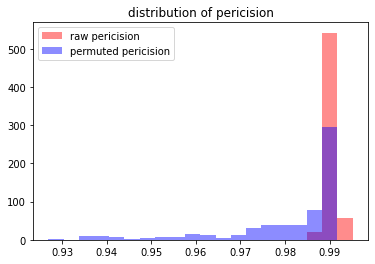

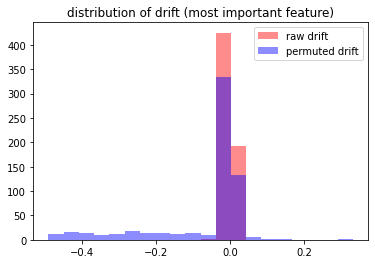

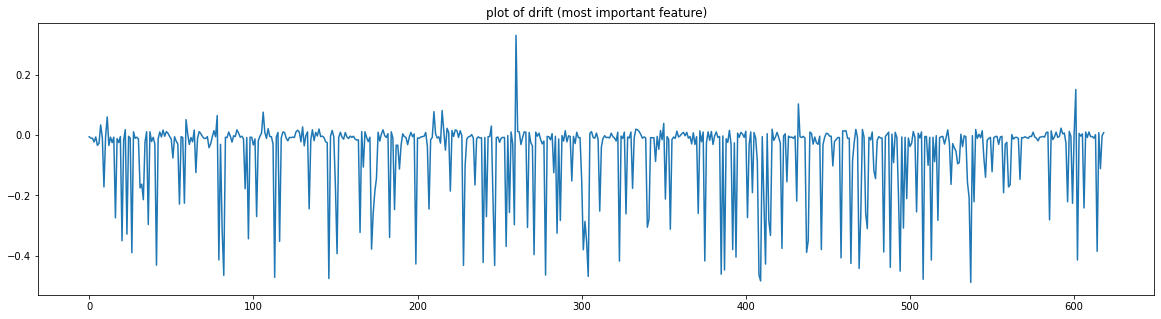

(619, 7)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1222.
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                        0.00
Time:                        06:05:13   Log-Likelihood:                          2486.2
No. Observations:                 619   AIC:                                     -4958.
Df Residuals:                     612   BIC:                                     -4927.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------

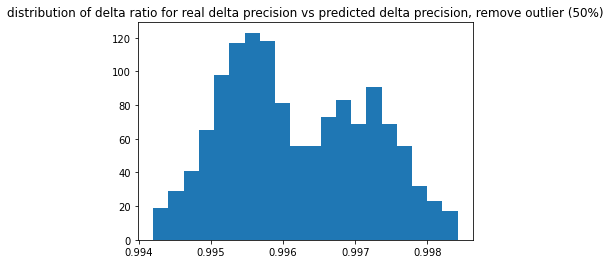


MDR: 0.9961877166494552
delta_mean:-0.0036607302585580648 pred_mean:0.9941696483137821 real_dist:0.022831050228310557, pred_dist0.019640071424950167, dist_ratio:-1.1624728716264576


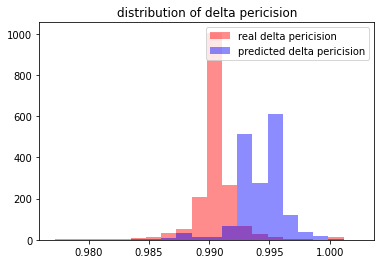

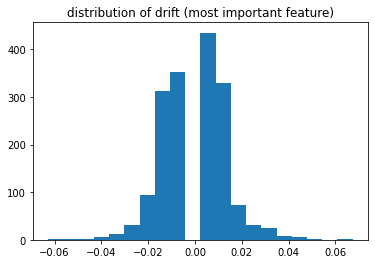

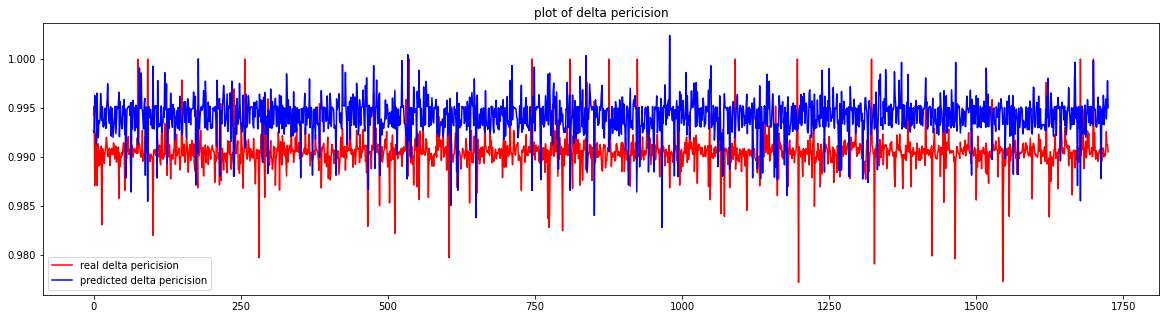

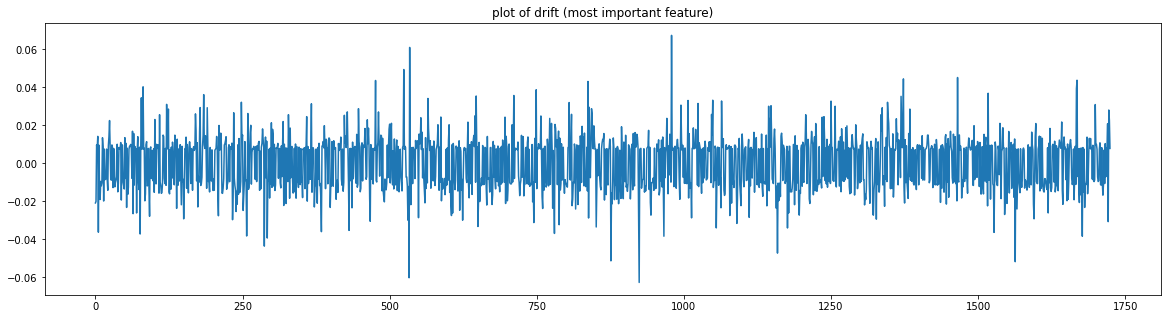

0.9902467010900746 - 0.9908045977011494
0.9921829762594094 - 0.983386394604143
0.9918993201215102 - 0.9805413058802188
0.9906144595981815 - 0.9794823149892079
0.9895403653506187 - 0.9719677255061386
0.9874599008457277 - 0.9663088367377054
0.9876381617219313 - 0.9611912151339049
0.988351776354106 - 0.9623788826018537
0.9872327790973872 - 0.9582601963903878
0.9875506224688766 - 0.9567885376967052
0.9881761749926101 - 0.9584104877918398
0.9891016200294551 - 0.9589320219204092
0.9894752229206256 - 0.9621680762458044
0.9893017203990169 - 0.9621035627813961
0.988388969521045 - 0.9554714307924422
0.9820273184759166 - 0.9486011860837986
0.9847130083645803 - 0.9494587920670681
0.9900642898889538 - 0.9506807509935105
0.9849034692988823 - 0.9457455798701627
0.9820653746022563 - 0.9405723099719249
0.98312662244015 - 0.9378449121384196
0.9850660539919587 - 0.9418639917025041
0.984251968503937 - 0.9463952967742192
0.9829170255526845 - 0.9470667819712648
0.9803978510236678 - 0.9450397682271524
0.9810

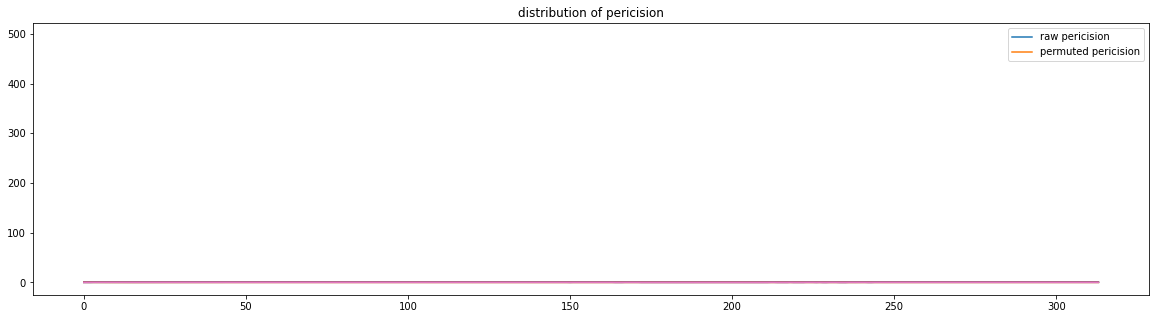

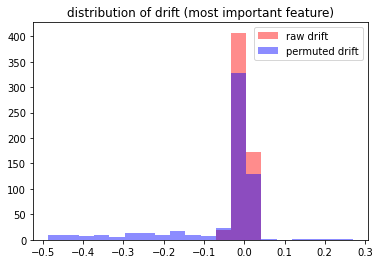

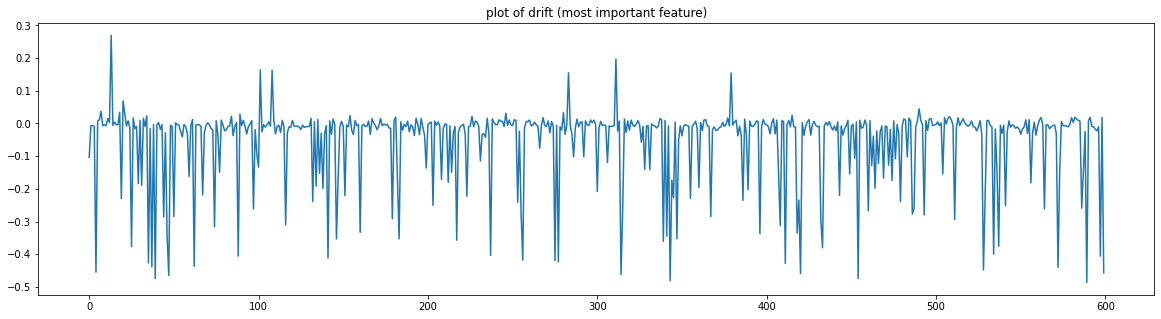

(600, 7)
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              837.4
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                   1.40e-302
Time:                        06:07:37   Log-Likelihood:                          2375.6
No. Observations:                 600   AIC:                                     -4737.
Df Residuals:                     593   BIC:                                     -4706.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------

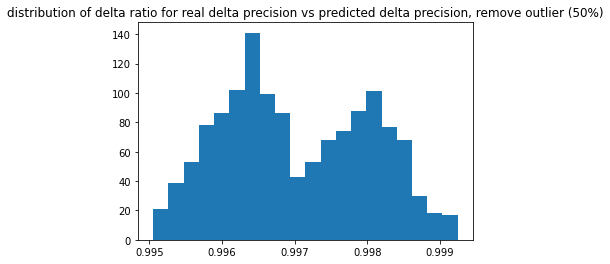


MDR: 0.9970256258002442
delta_mean:-0.002827383451835419 pred_mean:0.9933931293825375 real_dist:0.023696682464455, pred_dist0.01712333971964397, dist_ratio:-1.383882049438642


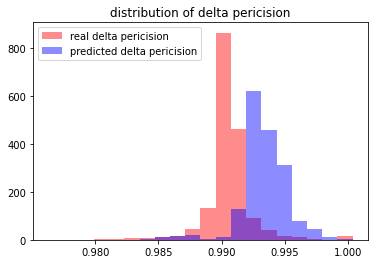

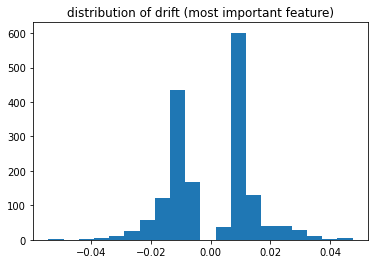

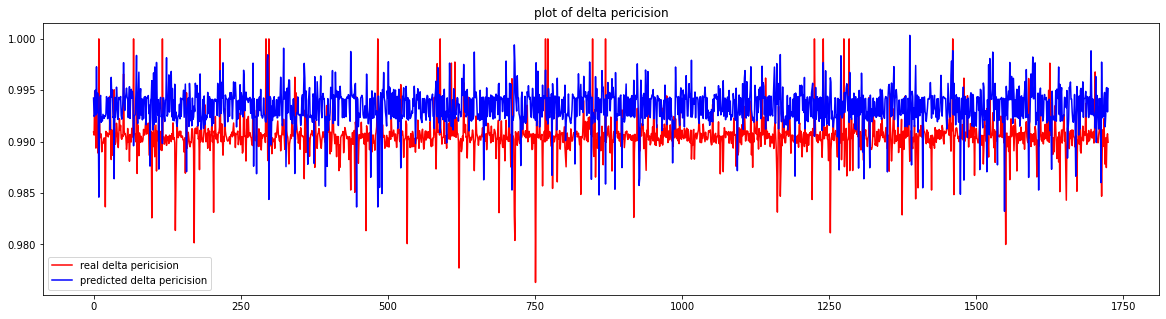

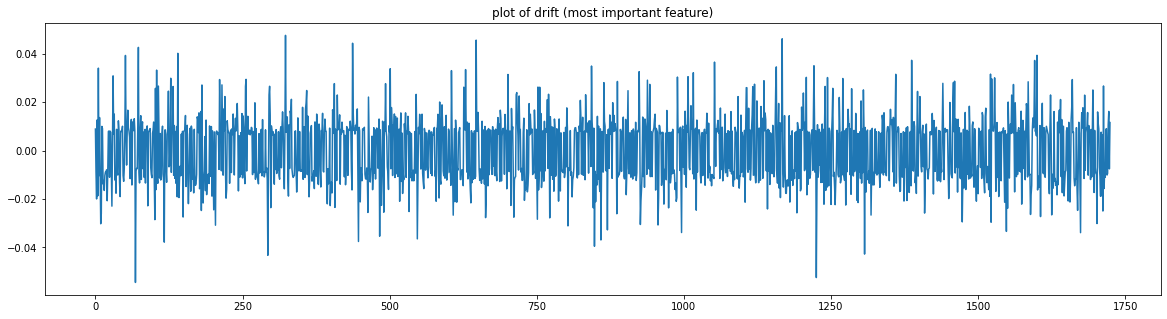

0.9902467010900746 - 0.9908045977011494
0.9921829762594094 - 0.9812854268138941
0.9918993201215102 - 0.9780166518651249
0.9906144595981815 - 0.9718445210957338
0.9895403653506187 - 0.962083243428683
0.9874599008457277 - 0.9555472141044843
0.9876381617219313 - 0.9488472601617441
0.988351776354106 - 0.9498593310443613
0.9872327790973872 - 0.9436823606489578
0.9875506224688766 - 0.940941532494238
0.9881761749926101 - 0.9433074220479906
0.9891016200294551 - 0.9438242923481588
0.9894752229206256 - 0.9474762611395106
0.9893017203990169 - 0.9475869666257726
0.988388969521045 - 0.9391977854402243
0.9820273184759166 - 0.9308548937102104
0.9847130083645803 - 0.9314975656176359
0.9900642898889538 - 0.9327690427847628
0.9849034692988823 - 0.926987423992829
0.9820653746022563 - 0.9206569767978366
0.98312662244015 - 0.917558696502465
0.9850660539919587 - 0.922055863696988
0.984251968503937 - 0.9276958744511551
0.9829170255526845 - 0.9285067353509471
0.9803978510236678 - 0.9253929379737384
0.98101174

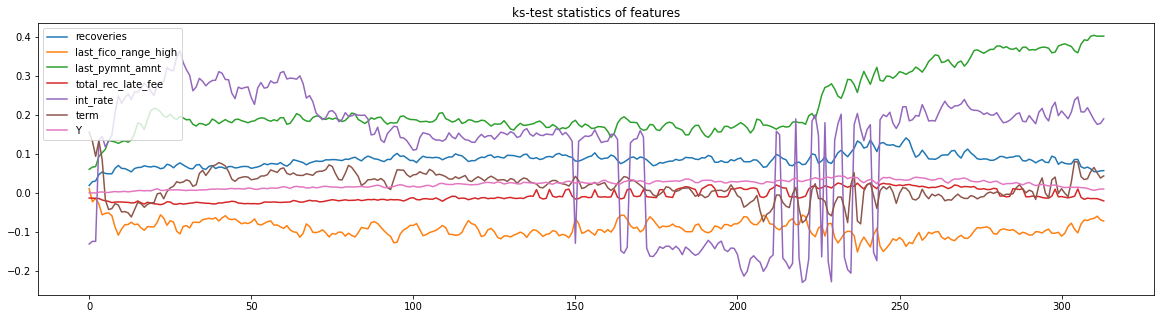

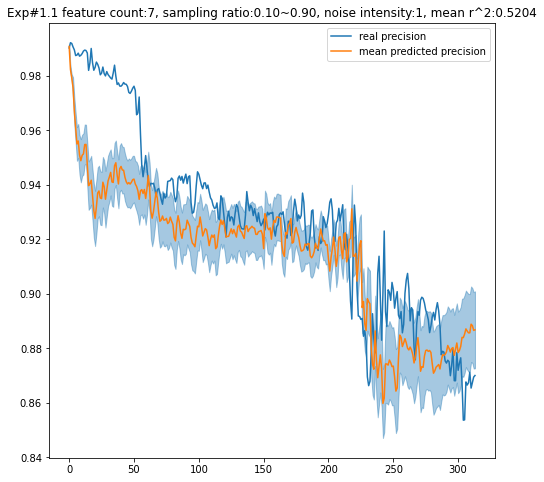

In [65]:
seed_everything()

Exp = 1.1
top = 7
samplingsigma=0.90
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 2
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=True)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()

Trial 0
1725/1725 drift1:-0.01291312321740512 real_acc:0.990041928721174 predict_acc:0.9895088274108743 delta_ratio:1.0005
MAE 0.025236228261509005
RMSE 0.030014089271509198
MAPE 0.027252496762259208
R2 0.1950557452327395
Trial 1
1725/1725 drift1:0.013778911712986175 real_acc:0.9903329752953813 predict_acc:0.9924275860815149 delta_ratio:0.9979
MAE 0.02135960501499216
RMSE 0.029875455399999695
MAPE 0.023456454791680355
R2 0.20247458221004588
Trial 2
1725/1725 drift1:-0.013007493015570581 real_acc:0.984375 predict_acc:0.9892298409762282 delta_ratio:0.9951
MAE 0.02387875125463945
RMSE 0.03244369436552437
MAPE 0.026319309764299588
R2 0.059462603533166014
Trial 3
1725/1725 drift1:-0.013904252161895947 real_acc:0.9892638036809815 predict_acc:0.989170628062724 delta_ratio:1.0001
MAE 0.0230227059401083
RMSE 0.028663295943851645
MAPE 0.024951617773402473
R2 0.2658788765508199
Trial 4
1725/1725 drift1:-0.0066042267334061044 real_acc:0.9893162393162394 predict_acc:0.9901040834082823 delta_ratio:0

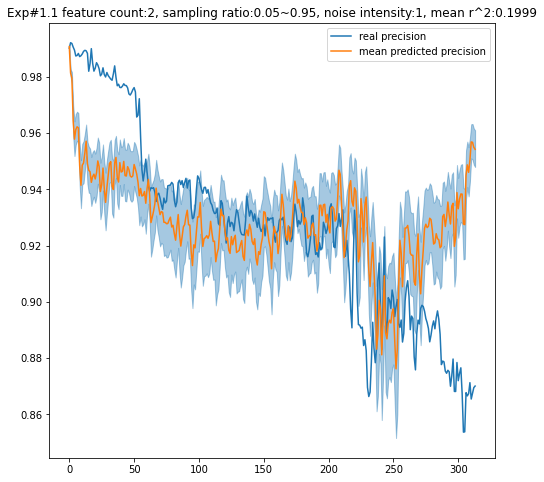

In [66]:
seed_everything()

Exp = 1.1
top = 2
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()


Trial 0
1725/1725 drift1:0.012671042660489351 real_acc:0.9917743830787309 predict_acc:0.9956301988178792 delta_ratio:0.9961
MAE 0.015384903350839866
RMSE 0.019998581697143848
MAPE 0.016504432229492074
R2 0.6426334840395178
Trial 1
1725/1725 drift1:-0.011212306887785739 real_acc:0.9898242368177613 predict_acc:0.9922493880031417 delta_ratio:0.9976
MAE 0.025988196068427942
RMSE 0.031167001968721592
MAPE 0.027759956656999926
R2 0.1320283867170453
Trial 2
1725/1725 drift1:0.008342455680549588 real_acc:0.9909983633387889 predict_acc:0.9945555675139806 delta_ratio:0.9964
MAE 0.015246304649292811
RMSE 0.019768279761591612
MAPE 0.016336839045178957
R2 0.6508168951493066
Trial 3
1725/1725 drift1:0.00958729334086672 real_acc:0.9904119318181818 predict_acc:0.9943944468971083 delta_ratio:0.9960
MAE 0.02271247917884702
RMSE 0.028008774339110937
MAPE 0.024226569375753453
R2 0.2990231520131167
Trial 4
1725/1725 drift1:0.010592739174697163 real_acc:0.9911868390129259 predict_acc:0.9948087881628908 delt

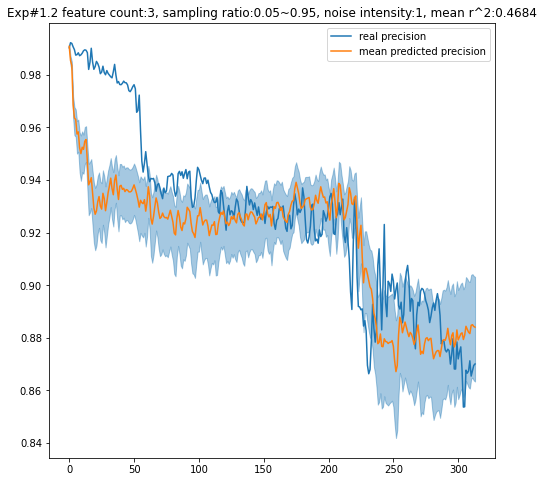

In [67]:
seed_everything()

Exp = 1.2
top = 3
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()


Trial 0
1725/1725 drift1:-0.01291312321740512 real_acc:0.990041928721174 predict_acc:0.9917540617612409 delta_ratio:0.9983
MAE 0.02089877646667768
RMSE 0.02624182892668941
MAPE 0.022275829490260055
R2 0.3846762685686753
Trial 1
1725/1725 drift1:0.013778911712986175 real_acc:0.9903329752953813 predict_acc:0.9951600103548564 delta_ratio:0.9951
MAE 0.015441666161011267
RMSE 0.020376034017159598
MAPE 0.016487377288022475
R2 0.629016342050687
Trial 2
1725/1725 drift1:-0.013007493015570581 real_acc:0.984375 predict_acc:0.9921448406887798 delta_ratio:0.9922
MAE 0.015271178088916287
RMSE 0.020128765449993404
MAPE 0.01630919737799369
R2 0.6379656790794868
Trial 3
1725/1725 drift1:-0.013904252161895947 real_acc:0.9892638036809815 predict_acc:0.9921521366409828 delta_ratio:0.9971
MAE 0.027957733500520117
RMSE 0.03306153147201863
MAPE 0.029889294273997134
R2 0.023299524435607566
Trial 4
1725/1725 drift1:-0.0066042267334061044 real_acc:0.9893162393162394 predict_acc:0.9924907323574202 delta_ratio:0

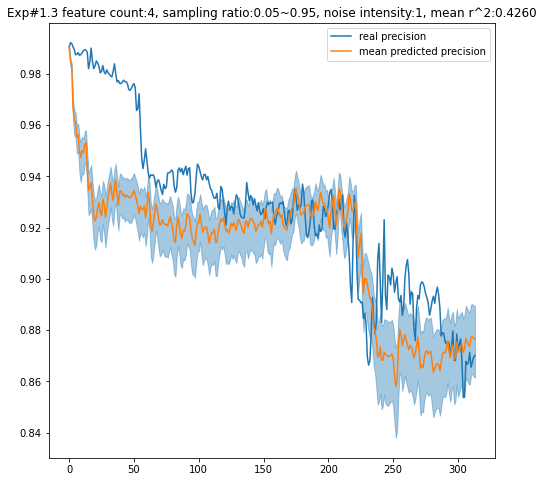

In [68]:
seed_everything()

Exp = 1.3
top = 4
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.009550666252306717 real_acc:0.9909596662030598 predict_acc:0.9984695353926495 delta_ratio:0.9925
MAE 0.012674650390785098
RMSE 0.01615121892937565
MAPE 0.013764138628249262
R2 0.7669086950987302
Trial 1
1725/1725 drift1:0.026064934204976464 real_acc:0.9886685552407932 predict_acc:0.996205574893864 delta_ratio:0.9924
MAE 0.019862944532967077
RMSE 0.025304058295520706
MAPE 0.02189236382414969
R2 0.4278685467778198
Trial 2
1725/1725 drift1:-0.007620490355358611 real_acc:0.9911154985192497 predict_acc:1.000785842765659 delta_ratio:0.9903
MAE 0.024906951683154543
RMSE 0.029960715455388465
MAPE 0.027315971164903356
R2 0.19791605166549642
Trial 3
1725/1725 drift1:0.007911647753143791 real_acc:0.9907407407407407 predict_acc:0.9982117312213148 delta_ratio:0.9925
MAE 0.01799883504801112
RMSE 0.02248641537661269
MAPE 0.019794615348658257
R2 0.5481899128553102
Trial 4
1725/1725 drift1:-0.00986637269627888 real_acc:0.9908396946564886 predict_acc:0.9994931850776768 delta_r

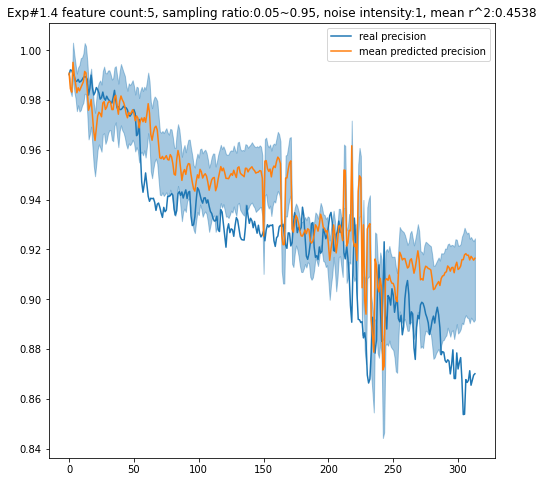

In [69]:

seed_everything()

Exp = 1.4
top = 5
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.012671042660489351 real_acc:0.9917743830787309 predict_acc:0.9944486949002718 delta_ratio:0.9973
MAE 0.016798379295851124
RMSE 0.02206582635733057
MAPE 0.017870539242674222
R2 0.5649332860114543
Trial 1
1725/1725 drift1:-0.011212306887785739 real_acc:0.9898242368177613 predict_acc:0.9911972370387606 delta_ratio:0.9986
MAE 0.04388144912990074
RMSE 0.047559102052448524
MAPE 0.04717834326522304
R2 -1.0210765244967948
Trial 2
1725/1725 drift1:0.008342455680549588 real_acc:0.9909983633387889 predict_acc:0.9963538593726583 delta_ratio:0.9946
MAE 0.01406344071745651
RMSE 0.018053616965814718
MAPE 0.015101005419487888
R2 0.7087647674417328
Trial 3
1725/1725 drift1:0.00958729334086672 real_acc:0.9904119318181818 predict_acc:0.9950952921301507 delta_ratio:0.9953
MAE 0.026658915019646377
RMSE 0.03045228845279333
MAPE 0.02860827132150403
R2 0.17138014601342055
Trial 4
1725/1725 drift1:0.010592739174697163 real_acc:0.9911868390129259 predict_acc:0.9947192118332748 delta_r

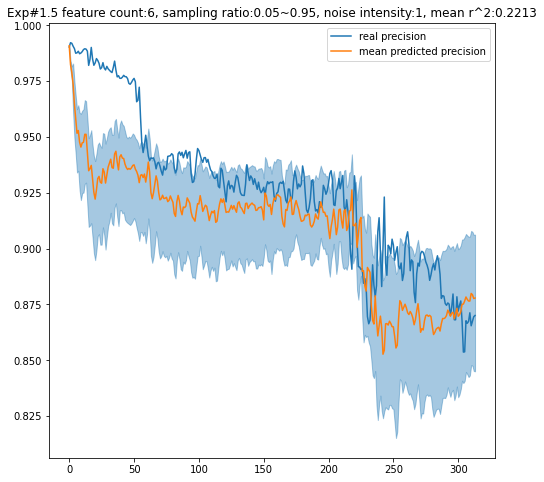

In [71]:
seed_everything()

Exp = 1.5
top = 6
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9963898787060033 delta_ratio:0.9941
MAE 0.013219184560338703
RMSE 0.017269389149482197
MAPE 0.014351264848262282
R2 0.7335170562754342
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9945454096744857 delta_ratio:0.9954
MAE 0.025793929780877606
RMSE 0.030306501879539066
MAPE 0.02755669185078463
R2 0.17929498549984124
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9939412037411415 delta_ratio:0.9966
MAE 0.02119016701323954
RMSE 0.026301576357116625
MAPE 0.02253959711199037
R2 0.3818711390853725
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9932900281477582 delta_ratio:0.9980
MAE 0.013038083300565722
RMSE 0.017633131718558515
MAPE 0.014016653522133705
R2 0.72217305176832
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9935499382801178 delta

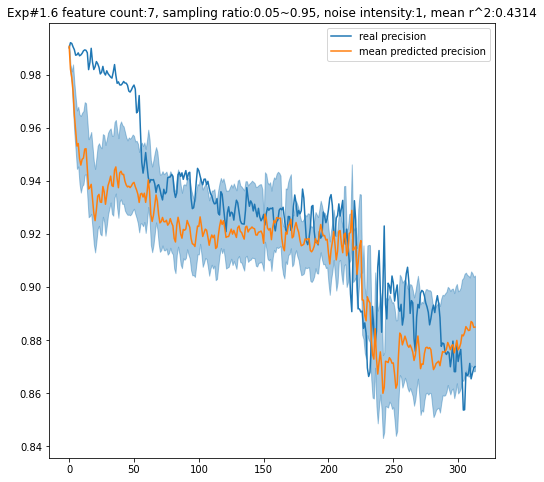

In [72]:
seed_everything()

Exp = 1.6
top = 7
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio,m,pm = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,m,pm,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:-0.01291312321740512 real_acc:0.990041928721174 predict_acc:0.9916660196289581 delta_ratio:0.9984
MAE 0.028222710529486786
RMSE 0.031171236552616104
MAPE 0.030879544592162134
R2 0.1317925123580892
Trial 1
1725/1725 drift1:0.013778911712986175 real_acc:0.9903329752953813 predict_acc:0.9944301840413001 delta_ratio:0.9959
MAE 0.039462680887184645
RMSE 0.043864997270492874
MAPE 0.04330191567638575
R2 -0.7193000604717847
Trial 2
1725/1725 drift1:-0.013007493015570581 real_acc:0.984375 predict_acc:0.9914811797724029 delta_ratio:0.9928
MAE 0.02649892108586442
RMSE 0.029223860062328116
MAPE 0.028943479126606674
R2 0.23688388586335452
Trial 3
1725/1725 drift1:-0.013904252161895947 real_acc:0.9892638036809815 predict_acc:0.9926440501514693 delta_ratio:0.9966
MAE 0.017976193892928056
RMSE 0.02136285520542414
MAPE 0.019576966410916233
R2 0.592212359334767
Trial 4
1725/1725 drift1:-0.0066042267334061044 real_acc:0.9893162393162394 predict_acc:0.9899099954529839 delta_ratio:

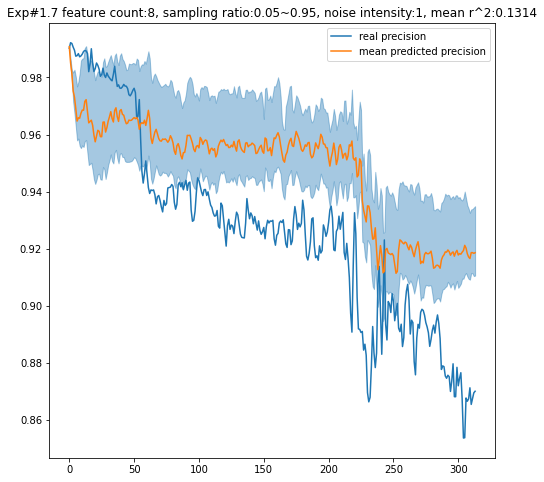

In [ ]:
seed_everything()

Exp = 1.7
top = 8
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:-0.00957881239422631 real_acc:0.9903846153846154 predict_acc:0.9918521925031355 delta_ratio:0.9985
MAE 0.031582070680708084
RMSE 0.03508600296660838
MAPE 0.034569495991760096
R2 -0.09997611928151384
Trial 1
1725/1725 drift1:0.012617431034232296 real_acc:0.9912023460410557 predict_acc:0.9943544421558177 delta_ratio:0.9968
MAE 0.03782001591138421
RMSE 0.04305764015367114
MAPE 0.04160893776410047
R2 -0.6565933471717476
Trial 2
1725/1725 drift1:-0.01155732493127537 real_acc:0.9919517102615694 predict_acc:0.9895119382146741 delta_ratio:1.0025
MAE 0.023169777876528932
RMSE 0.02668912430795109
MAPE 0.025263159069227006
R2 0.36352094880517216
Trial 3
1725/1725 drift1:-0.007767098078202306 real_acc:0.9900744416873449 predict_acc:0.9914600603462203 delta_ratio:0.9986
MAE 0.028540520842593554
RMSE 0.031502586135359556
MAPE 0.031141298615548377
R2 0.11323635367467844
Trial 4
1725/1725 drift1:0.010466206534241573 real_acc:0.9880478087649402 predict_acc:0.9922722371777518 de

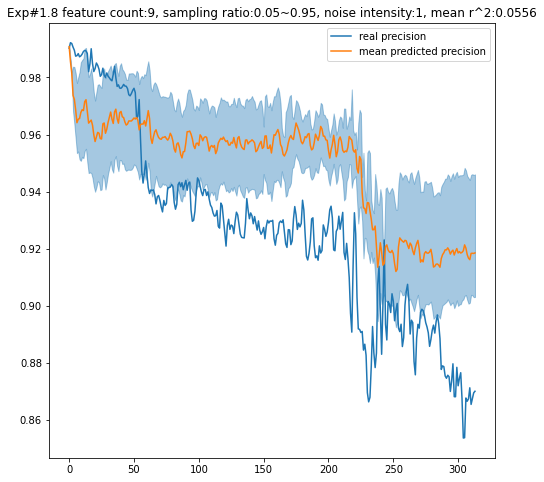

In [ ]:

seed_everything()

Exp = 1.8
top = 9
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.009550666252306717 real_acc:0.9909596662030598 predict_acc:0.991740694933492 delta_ratio:0.9992
MAE 0.020899411205248557
RMSE 0.024590394295072687
MAPE 0.022670098869397616
R2 0.4596857145043315
Trial 1
1725/1725 drift1:0.026064934204976464 real_acc:0.9886685552407932 predict_acc:0.9948514156488655 delta_ratio:0.9938
MAE 0.04630125126515421
RMSE 0.050556857622333286
MAPE 0.05073459561272761
R2 -1.2838922452767219
Trial 2
1725/1725 drift1:-0.007620490355358611 real_acc:0.9911154985192497 predict_acc:0.9926183411556533 delta_ratio:0.9985
MAE 0.031163929703023913
RMSE 0.03449241634206294
MAPE 0.03414199763012967
R2 -0.06307206082069827
Trial 3
1725/1725 drift1:0.007911647753143791 real_acc:0.9907407407407407 predict_acc:0.9932960616057611 delta_ratio:0.9974
MAE 0.029880127191280647
RMSE 0.03350650524833938
MAPE 0.03274779050475884
R2 -0.0031681406824994873
Trial 4
1725/1725 drift1:-0.00986637269627888 real_acc:0.9908396946564886 predict_acc:0.9875597511818683 de

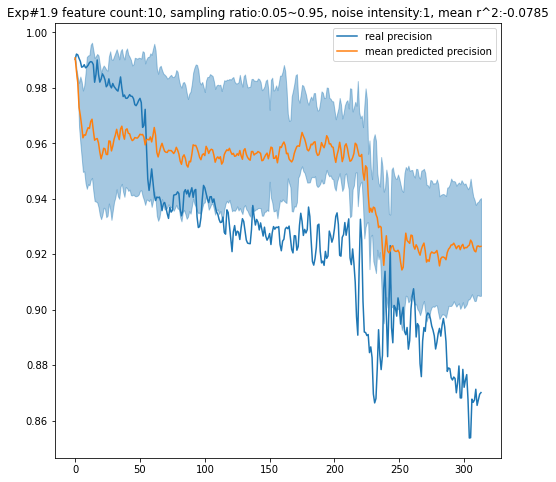

In [ ]:
seed_everything()

Exp = 1.9
top = 10
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.995030723580557 delta_ratio:0.9955
MAE 0.017774855648262124
RMSE 0.021823858659634276
MAPE 0.01942480800302024
R2 0.5744226110190183
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.995159415727418 delta_ratio:0.9948
MAE 0.014190865644988837
RMSE 0.018999822879511907
MAPE 0.015322820366679084
R2 0.6774369849437529
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9930841017520572 delta_ratio:0.9975
MAE 0.021481005942750712
RMSE 0.025686806682100265
MAPE 0.023419924242589714
R2 0.41042956142474973
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.992758477597917 delta_ratio:0.9985
MAE 0.019920144138858623
RMSE 0.02388795654358175
MAPE 0.021789898805853115
R2 0.49011355608754037
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9930991868689977 delt

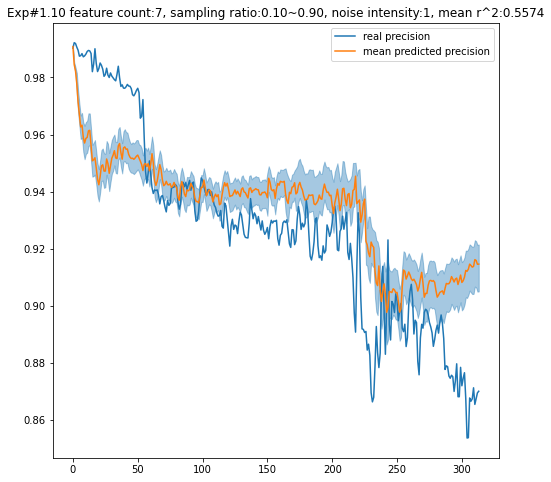

In [ ]:
seed_everything()

Exp = '1.10'
top = 7
samplingsigma=0.90
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9955048150021455 delta_ratio:0.9950
MAE 0.017975206591064403
RMSE 0.02197074916478798
MAPE 0.01965599748764056
R2 0.5686744380097086
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9954658579819466 delta_ratio:0.9945
MAE 0.01572795114295324
RMSE 0.02027122563865881
MAPE 0.01706822505056595
R2 0.6328229902205931
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.994010140019575 delta_ratio:0.9965
MAE 0.019978045133580667
RMSE 0.02396852744123468
MAPE 0.021805195893593147
R2 0.4866681972947047
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9935729008220455 delta_ratio:0.9977
MAE 0.02112175009947339
RMSE 0.02494803992906303
MAPE 0.023145545046038787
R2 0.4438546299528243
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9935869719616879 delta_rati

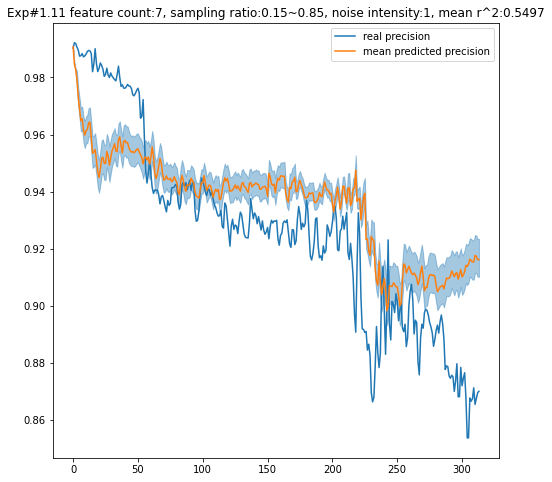

In [ ]:
seed_everything()

Exp = 1.11
top = 7
samplingsigma=0.85
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9969359055490252 delta_ratio:0.9936
MAE 0.020690081794267564
RMSE 0.024939654768885662
MAPE 0.02273834579461366
R2 0.44422841357129106
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9953388560866236 delta_ratio:0.9946
MAE 0.014671583419227769
RMSE 0.019383724428800552
MAPE 0.01588671472764202
R2 0.6642701788888832
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9958248236086759 delta_ratio:0.9947
MAE 0.023612476267098174
RMSE 0.027368111287679284
MAPE 0.025908974762061547
R2 0.33072420372493316
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9945134295257465 delta_ratio:0.9967
MAE 0.021001520538922198
RMSE 0.024955090570895285
MAPE 0.023044778163839322
R2 0.44354023764700723
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.994448942189889 d

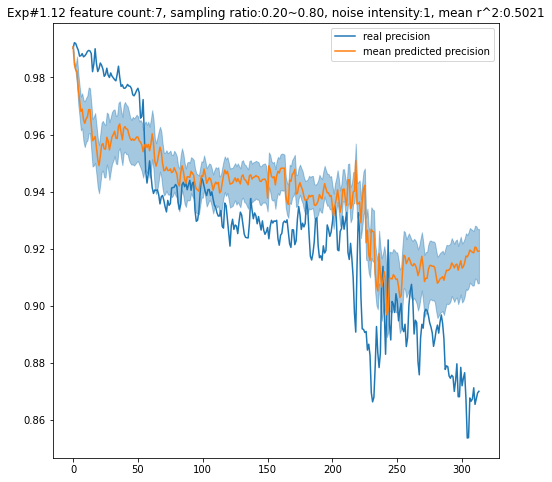

In [ ]:
seed_everything()

Exp = 1.12
top = 7
samplingsigma=0.80
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9971778511984797 delta_ratio:0.9933
MAE 0.02112397071785149
RMSE 0.025420736235821056
MAPE 0.0232248986311178
R2 0.422580144110301
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9963382176623612 delta_ratio:0.9936
MAE 0.015761101229717026
RMSE 0.019969310480741465
MAPE 0.017191165652249582
R2 0.6436788478969724
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9950415766158996 delta_ratio:0.9955
MAE 0.022870919684510178
RMSE 0.026639420175277664
MAPE 0.02506312544497404
R2 0.3658894177542157
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9942998635700939 delta_ratio:0.9970
MAE 0.022212386759642124
RMSE 0.026075655335749456
MAPE 0.024377159838176354
R2 0.3924445387565151
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9956580156310366 delta_

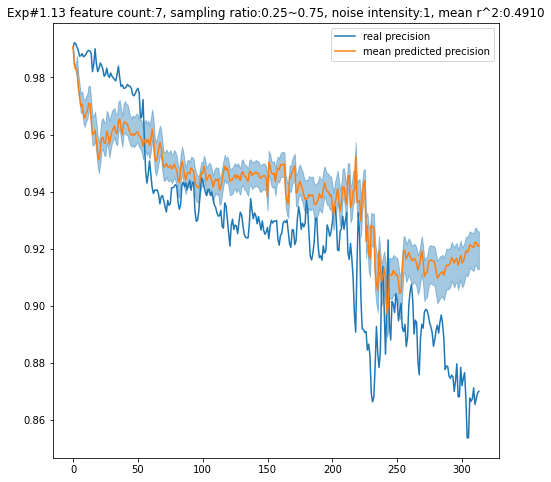

In [ ]:

seed_everything()

Exp = 1.13
top = 7
samplingsigma=0.75
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9980206874743814 delta_ratio:0.9925
MAE 0.022969966514149315
RMSE 0.027943164742844608
MAPE 0.025313162788148377
R2 0.30230333425062916
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9969055071943441 delta_ratio:0.9930
MAE 0.016233115700150024
RMSE 0.02041569453629622
MAPE 0.01776164362990611
R2 0.6275707492766192
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9956368033311774 delta_ratio:0.9949
MAE 0.02291567388511096
RMSE 0.026763988251740402
MAPE 0.025140026709172016
R2 0.35994524805176475
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.994630402350204 delta_ratio:0.9966
MAE 0.022142567785745623
RMSE 0.026277792833899336
MAPE 0.024327099033612413
R2 0.3829885348648443
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9951237872307394 del

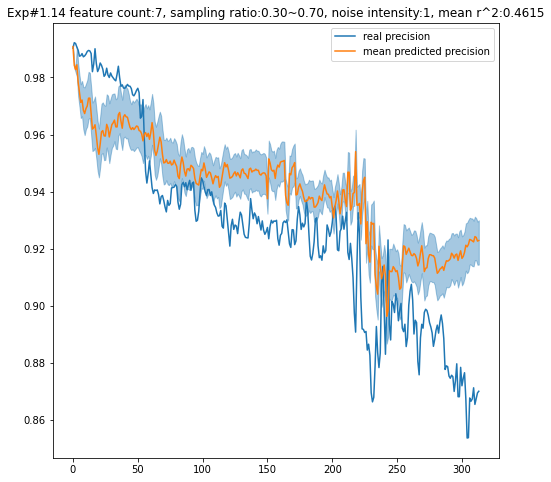

In [ ]:
seed_everything()

Exp = 1.14
top = 7
samplingsigma=0.70
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9939863262964336 delta_ratio:0.9965
MAE 0.015238932286863759
RMSE 0.020174513044560922
MAPE 0.016569027668746412
R2 0.6363181840833367
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9948718818727721 delta_ratio:0.9950
MAE 0.014767010816272798
RMSE 0.019946636243748508
MAPE 0.015957321833507412
R2 0.6444875611885897
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9928374596260917 delta_ratio:0.9977
MAE 0.021656662522144956
RMSE 0.026071489133290167
MAPE 0.023638663007112884
R2 0.39263866594639774
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9915742110510455 delta_ratio:0.9997
MAE 0.01892342727593504
RMSE 0.02345755880558067
MAPE 0.02067265977271056
R2 0.5083216419816787
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9916082360968164 del

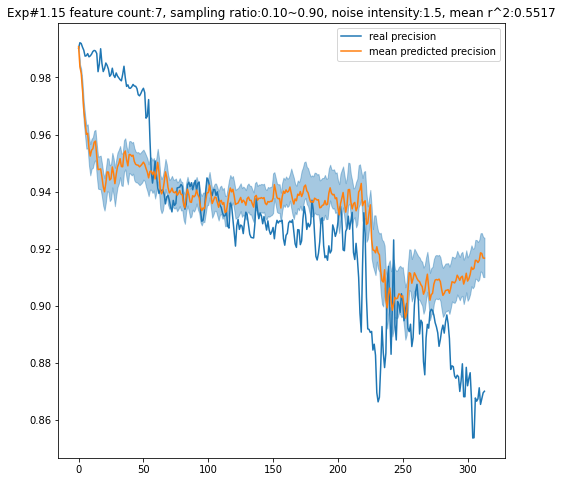

In [ ]:
seed_everything()

Exp = 1.15
top = 7
samplingsigma=0.90
permutaionsigma=1.5

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9927055794947008 delta_ratio:0.9978
MAE 0.015801543332460723
RMSE 0.021146285337168405
MAPE 0.01714426276716638
R2 0.6004384941336123
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9940809863946384 delta_ratio:0.9958
MAE 0.015583601476952735
RMSE 0.02118165048068215
MAPE 0.016790405315132928
R2 0.5991009196357755
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9926898971866913 delta_ratio:0.9979
MAE 0.02092385193183864
RMSE 0.025613709254709068
MAPE 0.022828094273114913
R2 0.413780290317881
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9903159628090187 delta_ratio:1.0010
MAE 0.018646029212193684
RMSE 0.023583203049983344
MAPE 0.020331154812736472
R2 0.5030404444595796
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9907609656164615 delta

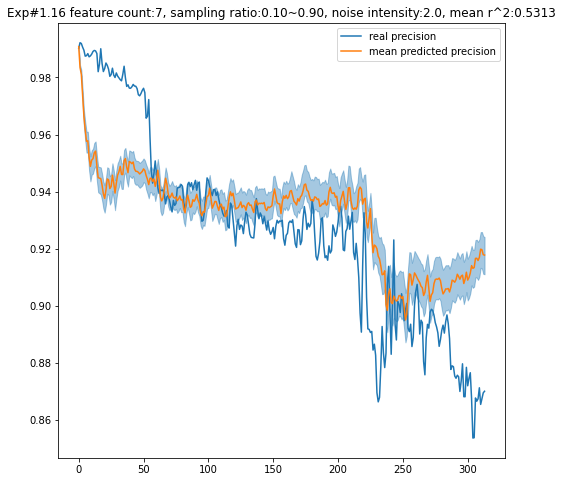

In [ ]:
seed_everything()

Exp = 1.16
top = 7
samplingsigma=0.90
permutaionsigma=2.0

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9929557252882136 delta_ratio:0.9975
MAE 0.01603290915867893
RMSE 0.02134888653731645
MAPE 0.01743232420288864
R2 0.5927454704600503
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9934557780498698 delta_ratio:0.9965
MAE 0.01619296293063133
RMSE 0.022015881817491395
MAPE 0.017423561960254224
R2 0.5669005466221497
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9928047281124853 delta_ratio:0.9977
MAE 0.021702721314984522
RMSE 0.026308382419356457
MAPE 0.02370943021961268
R2 0.38155119112723535
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9906390704401538 delta_ratio:1.0006
MAE 0.019029905892794227
RMSE 0.023947595621818047
MAPE 0.020784092165299077
R2 0.4875643955953669
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9904670824727206 delta

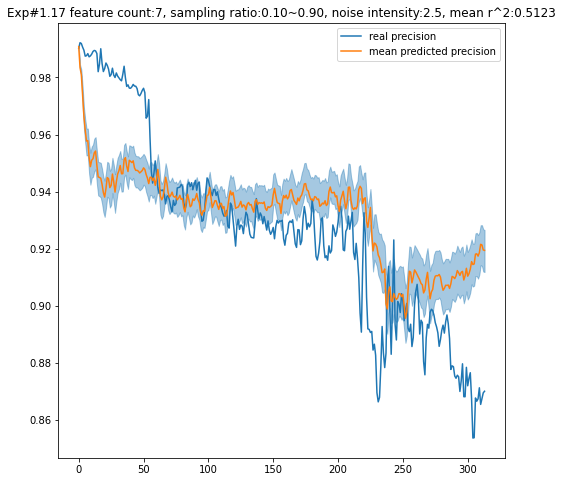

In [ ]:
seed_everything()

Exp = 1.17
top = 7
samplingsigma=0.90
permutaionsigma=2.5

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.993241780428056 delta_ratio:0.9973
MAE 0.01627251115066595
RMSE 0.021558182618644735
MAPE 0.01772507256178055
R2 0.5847212026937305
Trial 1
1725/1725 drift1:0.011601574253796931 real_acc:0.9899425287356322 predict_acc:0.9933626276382732 delta_ratio:0.9966
MAE 0.01611798583806541
RMSE 0.021973761896505312
MAPE 0.0173541920047189
R2 0.5685561391491708
Trial 2
1725/1725 drift1:0.012221166907942282 real_acc:0.9905660377358491 predict_acc:0.9923563113224207 delta_ratio:0.9982
MAE 0.022464385659326288
RMSE 0.02709243121743054
MAPE 0.024542590834320976
R2 0.34413957817174434
Trial 3
1725/1725 drift1:-0.011813298711430109 real_acc:0.9912698412698413 predict_acc:0.9911800465833754 delta_ratio:1.0001
MAE 0.019564370172359024
RMSE 0.02442461949579113
MAPE 0.02141041794508903
R2 0.466946157250117
Trial 4
1725/1725 drift1:0.0069557322474089744 real_acc:0.9906759906759907 predict_acc:0.9899286646968384 delta_rati

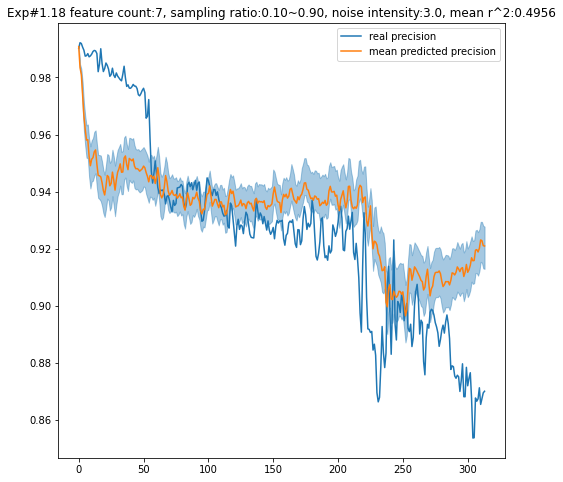

In [ ]:

seed_everything()

Exp = 1.18
top = 7
samplingsigma=0.90
permutaionsigma=3.0

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



In [ ]:
seed_everything()

Exp = 1.19
top = 7
samplingsigma=0.90
permutaionsigma=0.5

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1725/1725 drift1:0.007876839193594165 real_acc:0.9905115511551155 predict_acc:0.9957519772350464 delta_ratio:0.9947
MAE 0.02970689932015293
RMSE 0.03328800561413326
MAPE 0.0325932693411538
R2 0.00987274095661761
Trial 1
1341/1725 drift1:0.015643531147711 real_acc:0.9922822491730982 predict_acc:0.996399380308986 delta_ratio:0.9959

KeyboardInterrupt: ignored

In [ ]:

seed_everything()

Exp = 1.20
top = 7
samplingsigma=0.90
permutaionsigma=0.0

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(ML[2010].predict,COLUMNS, ML[2010].feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=scaler,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(Y2,X2,mdr,dist_ratio,window_size = length,step = int(length/2))
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



### Error chart

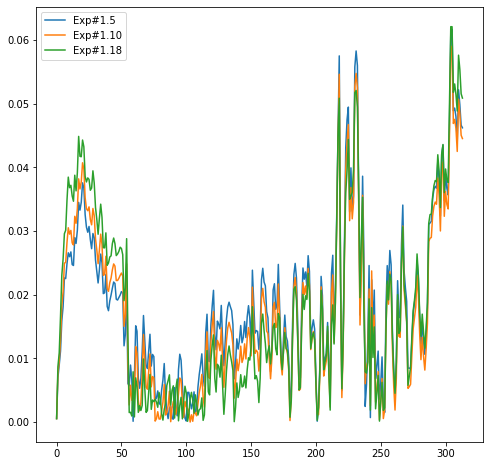

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#1.5','Exp#1.10','Exp#1.18']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))

# 8. Credit card transactions 실험


https://www.kaggle.com/datasets/ealtman2019/credit-card-transactions

https://www.kaggle.com/code/vadimabronin/notebookd76fc110c7

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


## 데이터 구축

In [ ]:
!kaggle datasets download "ealtman2019/credit-card-transactions"

 99% 261M/263M [00:02<00:00, 102MB/s]
100% 263M/263M [00:02<00:00, 129MB/s]


In [ ]:
!unzip credit-card-transactions.zip

Archive:  credit-card-transactions.zip
  inflating: User0_credit_card_transactions.csv  
  inflating: credit_card_transactions-ibm_v2.csv  
  inflating: sd254_cards.csv         
  inflating: sd254_users.csv         


In [ ]:
df = pd.read_csv("credit_card_transactions-ibm_v2.csv")

In [ ]:
df['Year'].value_counts()

2019    1723938
2017    1723360
2018    1721615
2016    1708924
2015    1701371
2014    1672343
2013    1650917
2012    1610829
2011    1570551
2010    1491225
2009    1355434
2008    1223460
2007    1064483
2006     908793
2005     746653
2004     597003
2003     466408
2002     350732
2020     336500
2001     257998
2000     177729
1999     118250
1998      78345
1997      49753
1996      29945
1995      20928
1994      14316
1993       8378
1992       5134
1991       1585
Name: Year, dtype: int64

### 데이터 정체 (1/30 로 축소)

In [ ]:
import numpy as np 
import pandas as pd 
import os
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_everything()

In [ ]:
df['Is Fraud?']=df['Is Fraud?'].replace({'No':0,'Yes':1}) 

In [ ]:
df1 = df[df['Is Fraud?']==1]
df2 = df[df['Is Fraud?']==0]
df3 = df2.sample(int(df2.shape[0]/30))
df4 = pd.concat([df1,df3])

print("Compression rate:",df4.shape[0] / df.shape[0] )

df = df4

Compression rate: 0.034512832709364456


### 기타 등등 전처리

In [ ]:
df['Errors?']=df['Errors?'].fillna('NAN')
df['Errors?']=df['Errors?'].apply(lambda value:value=='NAN')
df['Errors?'].value_counts()

True     827624
False     14037
Name: Errors?, dtype: int64

In [ ]:
df['Use Chip'].unique()
df['is online']=df['Use Chip'].apply(lambda value:value=='Online Transaction')

In [ ]:

from sklearn.preprocessing import LabelEncoder
df['Use Chip']=df['Use Chip'].replace({'Swipe Transaction':0, 'Online Transaction':1, 'Chip Transaction':2})
df['Zip'] = df['Zip'].fillna(df['Zip'].mean())  
df['Amount'] = df['Amount'].apply(lambda value: float(value.split("$")[1]))
df['Hour'] = df['Time'].apply(lambda value: int(value.split(":")[0]))
df['Minutes'] = df['Time'].apply(lambda value: int(value.split(":")[1]))
df.drop(['Time'], axis=1, inplace=True)     
df['Merchant State']=df['Merchant State'].fillna('NAN')    
df['Merchant City']=df['Merchant City'].fillna('NAN') 
df['is vozmes']=df['Amount'].apply(lambda value: value<0)  
df['abs_amount']=df['Amount'].apply(lambda value: abs(value))

In [ ]:
#encoding categorial features
le=LabelEncoder() 
df['Merchant State']=le.fit_transform(df['Merchant State'])
le=LabelEncoder()
df['Merchant City']=le.fit_transform(df['Merchant City'])
le=LabelEncoder()
df['Errors?']=le.fit_transform(df['Errors?'])
le=LabelEncoder()
df['is online']=le.fit_transform(df['is online'])
le=LabelEncoder()
df['is vozmes']=le.fit_transform(df['is vozmes'])

In [ ]:
df = df.sort_values(['Year','Month','Day'])

In [ ]:
df.Year.value_counts()

2016    60726
2018    60155
2015    59749
2019    59311
2017    57298
2014    56896
2013    56777
2012    55201
2010    53148
2011    52492
2009    46303
2008    44533
2007    37301
2006    31605
2005    25058
2004    20495
2003    15674
2002    11824
2020    11342
2001     9012
2000     6057
1999     3811
1998     2641
1997     1679
1996      920
1995      683
1994      461
1993      285
1992      159
1991       65
Name: Year, dtype: int64

### dataset 만들기

In [ ]:
drop_columns = ['Is Fraud?','Zip','Year','Month','Day','Minutes','User','Errors?','Merchant Name','Merchant City','Merchant State']
X = df[df['Year']==2007].drop(drop_columns,axis=1)
y = df[df['Year']==2007]['Is Fraud?']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37301 entries, 19831724 to 16154702
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Card        37301 non-null  int64  
 1   Amount      37301 non-null  float64
 2   Use Chip    37301 non-null  int64  
 3   MCC         37301 non-null  int64  
 4   is online   37301 non-null  int64  
 5   Hour        37301 non-null  int64  
 6   is vozmes   37301 non-null  int64  
 7   abs_amount  37301 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.6 MB


이러한 데이터는 시계열 데이터는 아니지만, 시간적 특성을 포함하는 데이터로서
testset을 나눌때 shuffle 없이 7:3으로 나눈다.

In [ ]:
X.shape

(37301, 8)

In [ ]:
offset = int(y.values.shape[0] * 0.7)
y_ref = y.values[0:offset]
x_ref = X.values[0:offset]
y_inf = y.values[offset:]
x_inf = X.values[offset:]

In [ ]:
x_ref.shape[0] + x_inf.shape[0]

37301

## 예측모델 구축

### Catboost 모델 

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


### Credit card fraud transaction detect model build

In [ ]:
#cat boost classifier

from catboost import CatBoostClassifier

seed_everything()

cat = CatBoostClassifier()
cat.fit(x_ref, y_ref,plot=False) 
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

Learning rate set to 0.041487
0:	learn: 0.6216151	total: 53.9ms	remaining: 53.9s
1:	learn: 0.5551103	total: 61.6ms	remaining: 30.7s
2:	learn: 0.4986417	total: 68.9ms	remaining: 22.9s
3:	learn: 0.4565464	total: 76.6ms	remaining: 19.1s
4:	learn: 0.4136850	total: 88.1ms	remaining: 17.5s
5:	learn: 0.3820252	total: 94.2ms	remaining: 15.6s
6:	learn: 0.3484819	total: 100ms	remaining: 14.2s
7:	learn: 0.3184745	total: 110ms	remaining: 13.6s
8:	learn: 0.2939070	total: 122ms	remaining: 13.4s
9:	learn: 0.2715727	total: 136ms	remaining: 13.5s
10:	learn: 0.2529872	total: 146ms	remaining: 13.1s
11:	learn: 0.2348952	total: 154ms	remaining: 12.7s
12:	learn: 0.2241845	total: 165ms	remaining: 12.5s
13:	learn: 0.2115322	total: 179ms	remaining: 12.6s
14:	learn: 0.2029825	total: 188ms	remaining: 12.3s
15:	learn: 0.1922771	total: 214ms	remaining: 13.1s
16:	learn: 0.1826835	total: 221ms	remaining: 12.8s
17:	learn: 0.1743241	total: 228ms	remaining: 12.4s
18:	learn: 0.1673404	total: 236ms	remaining: 12.2s
19:	l

In [ ]:
from sklearn.metrics import f1_score,roc_auc_score
print(f1_score(y_inf, y_pred)) 
print(roc_auc_score(y_inf, y_pred))

0.6974789915966385
0.7759890977827133


## Credit card fraud transaction detect model 성능 예측 실험

In [ ]:
df1 = df[df['Year'] >= 2008]
df2 = df1[df1['Year'] <= 2009]

X_test2 = df2[df2['Year'] >= 2008].drop(drop_columns,axis=1)
y_test2 = df2[df2['Year'] >= 2008]['Is Fraud?']

In [ ]:
y_pred=cat.predict(x_inf)
print(classification_report(y_inf, y_pred))  

base_score = precision_recall_fscore_support(y_inf, y_pred,average='binary')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10294
           1       0.94      0.56      0.70       897

    accuracy                           0.96     11191
   macro avg       0.95      0.78      0.84     11191
weighted avg       0.96      0.96      0.96     11191



In [ ]:
base_score

(0.9378531073446328, 0.5551839464882943, 0.6974789915966385, None)

In [ ]:

print("trainset:",X.shape)
print("online dataset:",X_test2.shape)

trainset: (37301, 8)
online dataset: (90836, 8)


In [ ]:
COLUMNS = X.columns

In [ ]:
COLUMNS

Index(['Card', 'Amount', 'Use Chip', 'MCC', 'is online', 'Hour', 'is vozmes',
       'abs_amount'],
      dtype='object')

In [ ]:
importances = cat.feature_importances_

### 실험

In [ ]:
erdic= {}

Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:1.0006824826308554 delta_ratio:0.9377
MAE 0.04155245047001618
RMSE 0.060305319262096424
MAPE 0.058823577132949174
R2 0.7190767420900419
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9945369181260768 delta_ratio:0.9421
MAE 0.04058828486773559
RMSE 0.05838085931048331
MAPE 0.05731091330808089
R2 0.7367202720351518
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0115343838249315 delta_ratio:0.9387
MAE 0.060344259362288134
RMSE 0.09081798258106855
MAPE 0.0865977632719115
R2 0.3628815893334536
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.016622473461287 delta_ratio:0.9336
MAE 0.04159223291893377
RMSE 0.06038180783100272
MAPE 0.05888541487473831
R2 0.7183636691779698
Trial 4
475/1000 acc:0.0742 0.1809 0.1053 sum:0.2414

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.031163190783365 delta_ratio:0.9072
MAE 0.04011745336735197
RMSE 0.05745034844455075
MAPE 0.056571357424414194
R2 0.7450460243724216
MAE:0.0448 +- 0.0068
RMSE:0.0655 +- 0.0112
MAPE:0.0636 +- 0.0101
r_2:0.6564 +- 0.1290


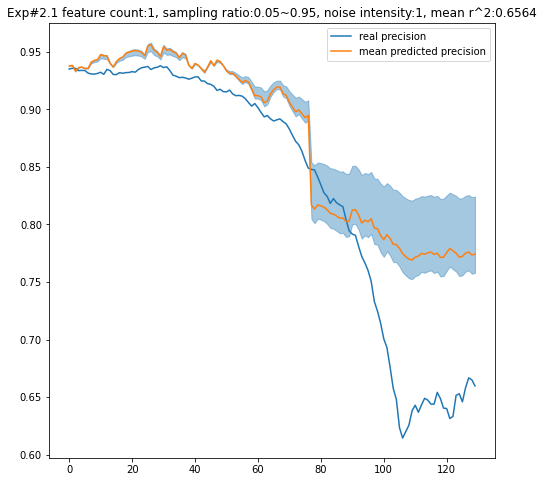

In [ ]:

seed_everything()

Exp = 2.1
top = 1
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9915370502772998 delta_ratio:0.9463
MAE 0.04330281054268232
RMSE 0.06717339842644494
MAPE 0.06245732298938665
R2 0.651445177740644
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9899659224140944 delta_ratio:0.9465
MAE 0.04048046118862252
RMSE 0.06087355707316701
MAPE 0.05788535541013251
R2 0.713757699054779
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.006018712850203 delta_ratio:0.9438
MAE 0.04042282849921487
RMSE 0.06092712080007952
MAPE 0.0578401950880154
R2 0.7132537380340664
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0115204147684034 delta_ratio:0.9383
MAE 0.041970222755185686
RMSE 0.06391225299905702
MAPE 0.06023306624952392
R2 0.6844670563915687
Trial 4
475/1000 acc:0.0742 0.1809 0.1053 sum:0.2289

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.017108225167118 delta_ratio:0.9197
MAE 0.04157241532298104
RMSE 0.06341142501134815
MAPE 0.059689616207264075
R2 0.6893928274250125
MAE:0.0415 +- 0.0009
RMSE:0.0633 +- 0.0020
MAPE:0.0596 +- 0.0015
r_2:0.6905 +- 0.0201


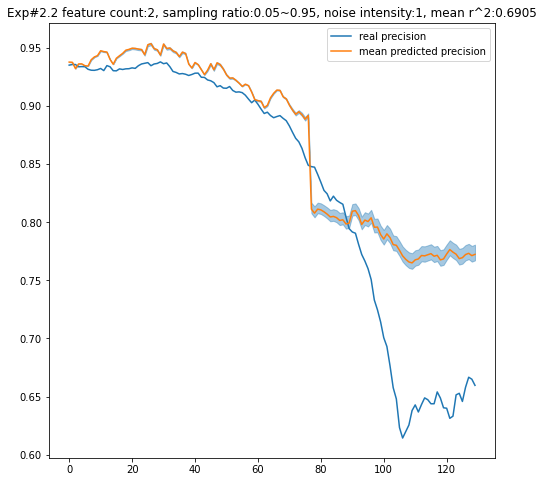

In [ ]:

seed_everything()

Exp = 2.2
top = 2
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.018245605040582036 real_acc:0.9563636363636364 predict_acc:1.0370309186099789 delta_ratio:0.9222
MAE 0.04695105113816688
RMSE 0.0748164086600152
MAPE 0.06819712886312283
R2 0.5676154482828633
Trial 1
738/1000 acc:0.3082 0.4225 0.3564 sum:0.1794

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 drift1:-0.012490226921232028 real_acc:0.946236559139785 predict_acc:1.0064376630667835 delta_ratio:0.9402
MAE 0.0426004064314602
RMSE 0.06668542454514065
MAPE 0.06158929816704851
R2 0.6564908615690859
Trial 2
154/1000 acc:0.2260 0.3810 0.2837 sum:0.2373

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


464/1000 acc:0.9364 0.4389 0.5977 sum:-0.1015

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 drift1:-0.016004466447730292 real_acc:0.9591836734693877 predict_acc:1.036496847997714 delta_ratio:0.9254
MAE 0.04944609500327822
RMSE 0.07892445878324489
MAPE 0.07187571089392848
R2 0.5188287401338005
Trial 3
1000/1000 drift1:-0.025289221678458373 real_acc:0.9404761904761905 predict_acc:1.0527074088370898 delta_ratio:0.8934
MAE 0.044638550752653224
RMSE 0.07015173214686724
MAPE 0.06459847241470039
R2 0.619851525492328
Trial 4
868/1000 acc:0.9286 0.5571 0.6964 sum:-0.1130

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 drift1:-0.01898257586902835 real_acc:0.940552016985138 predict_acc:1.0330254087097654 delta_ratio:0.9105
MAE 0.045347282428689434
RMSE 0.07180537062260131
MAPE 0.06576140139510472
R2 0.601718338081098
MAE:0.0458 +- 0.0020
RMSE:0.0725 +- 0.0036
MAPE:0.0664 +- 0.0030
r_2:0.5929 +- 0.0411


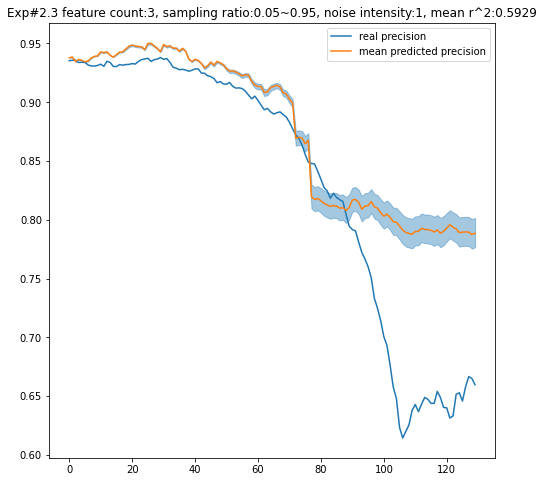

In [ ]:
seed_everything()

Exp = 2.3
top = 3
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:1.0228549854719282 delta_ratio:0.9174
MAE 0.044568143031538214
RMSE 0.07001158050421127
MAPE 0.0644908731157496
R2 0.6213689566589065
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:1.0269958985700018 delta_ratio:0.9123
MAE 0.043070350814868354
RMSE 0.06701396391026039
MAPE 0.06216105588663035
R2 0.6530977879021453
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0484133592339506 delta_ratio:0.9056
MAE 0.0461774216938438
RMSE 0.07287232868476189
MAPE 0.06689924895121221
R2 0.5897942438986601
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0489377589546804 delta_ratio:0.9048
MAE 0.0444115554076178
RMSE 0.06970997556015492
MAPE 0.0642508174341154
R2 0.6246241615130322
Trial 4
475/1000 acc:0.0742 0.1809 0.1053 sum:0.2022

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0690741986494625 delta_ratio:0.8750
MAE 0.04311821387305065
RMSE 0.0672455484969781
MAPE 0.06227130320198484
R2 0.6506960192551021
MAE:0.0443 +- 0.0010
RMSE:0.0694 +- 0.0019
MAPE:0.0640 +- 0.0015
r_2:0.6279 +- 0.0202


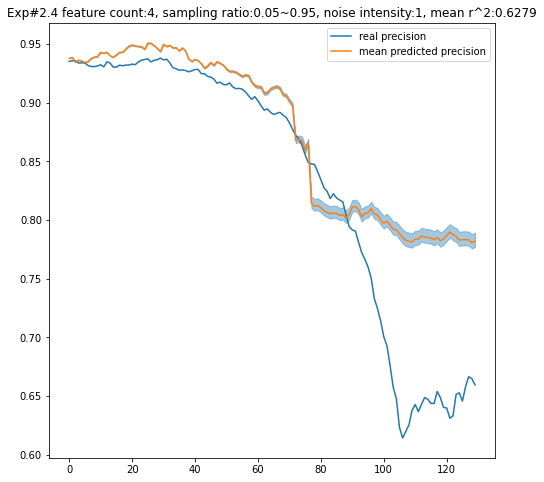

In [ ]:

seed_everything()

Exp = 2.4
top = 4
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.029904528868801794 real_acc:0.9456521739130435 predict_acc:1.0926059443104346 delta_ratio:0.8655
MAE 0.04499152405082679
RMSE 0.07091578189930725
MAPE 0.06515986638198601
R2 0.611525742121124
Trial 1
1000/1000 drift1:-0.01804225081489319 real_acc:0.9387755102040817 predict_acc:1.0397450040552387 delta_ratio:0.9029
MAE 0.04259232451585535
RMSE 0.06639262409981758
MAPE 0.06149912702527495
R2 0.6595007792030607
Trial 2
80/1000 acc:0.9336 0.4510 0.6082 sum:-0.0721

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


384/1000 acc:0.7534 0.5940 0.6643 sum:-0.1249

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

625/1000 acc:0.2549 0.3939 0.3095 sum:0.1899

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

1000/1000 drift1:-0.01937168837474401 real_acc:0.941747572815534 predict_acc:1.0455241826543413 delta_ratio:0.9007
MAE 0.04603790231656442
RMSE 0.07287709484962109
MAPE 0.06675462218325279
R2 0.5897405836895979
Trial 3
1000/1000 drift1:0.01368575129527605 real_acc:0.9150326797385621 predict_acc:0.9057760271491122 delta_ratio:1.0102
MAE 0.03981592709385707
RMSE 0.06082319814092542
MAPE 0.05714490558919752
R2 0.7142311031019182
Trial 4
311/1000 acc:0.9136 0.4852 0.6338 sum:-0.2744

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

1000/1000 drift1:-0.01488634486614232 real_acc:0.95 predict_acc:1.0247131441210553 delta_ratio:0.9271
MAE 0.04544988963379887
RMSE 0.07243240288473256
MAPE 0.06602856197930321
R2 0.5947320683208093
MAE:0.0438 +- 0.0020
RMSE:0.0687 +- 0.0040
MAPE:0.0633 +- 0.0031
r_2:0.6339 +- 0.0413


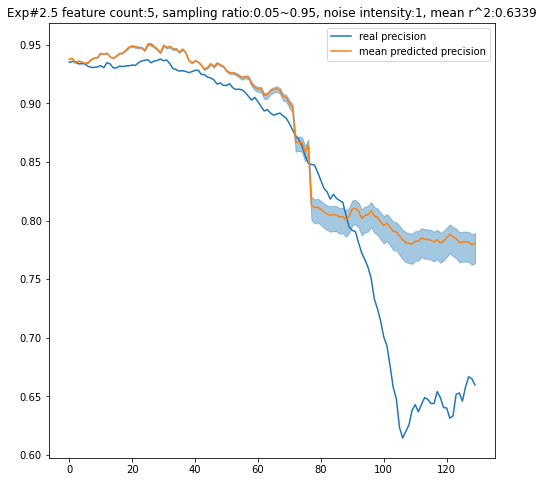

In [ ]:

seed_everything()

Exp = 2.5
top = 5
samplingsigma=0.95
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.993127983709781 delta_ratio:0.9448
MAE 0.04320504055616765
RMSE 0.06656249528786376
MAPE 0.06219823345483104
R2 0.6577561576122015
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9908642242995875 delta_ratio:0.9456
MAE 0.04052395147524427
RMSE 0.060921628479646626
MAPE 0.05794329530606088
R2 0.7133054336122457
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0076088095790983 delta_ratio:0.9423
MAE 0.04034226754284477
RMSE 0.0603549693458803
MAPE 0.05760284195053039
R2 0.7186139767756932
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0117119495269769 delta_ratio:0.9381
MAE 0.04197857418931627
RMSE 0.06360975125922767
MAPE 0.06016230000663927
R2 0.6874468724829822
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0183271939656935 delta_ratio

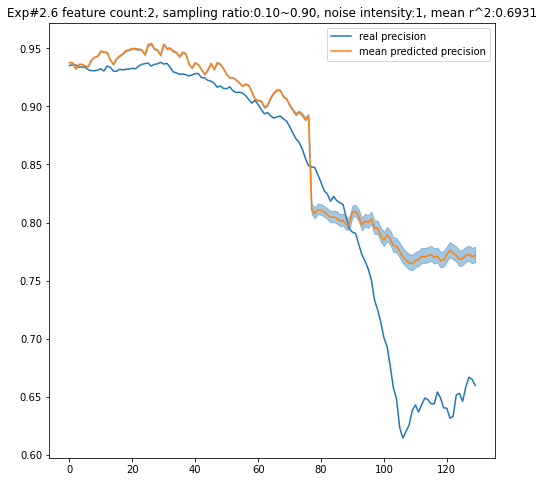

In [ ]:

seed_everything()

Exp = 2.6
top = 2
samplingsigma=0.90
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9940708016282467 delta_ratio:0.9439
MAE 0.04266953296892069
RMSE 0.06500610276559703
MAPE 0.061241931451748575
R2 0.6735740216023198
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9911246523402122 delta_ratio:0.9454
MAE 0.04051839046440395
RMSE 0.06063310892470876
MAPE 0.057859769283041054
R2 0.7160145246365757
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0076360351044076 delta_ratio:0.9423
MAE 0.04030288367019503
RMSE 0.06036506752629498
MAPE 0.057564881611179265
R2 0.718519809731337
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.012819616071175 delta_ratio:0.9371
MAE 0.04201796156003933
RMSE 0.06340814142651803
MAPE 0.06014963802694853
R2 0.6894249944546395
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0209699554546423 delta_rat

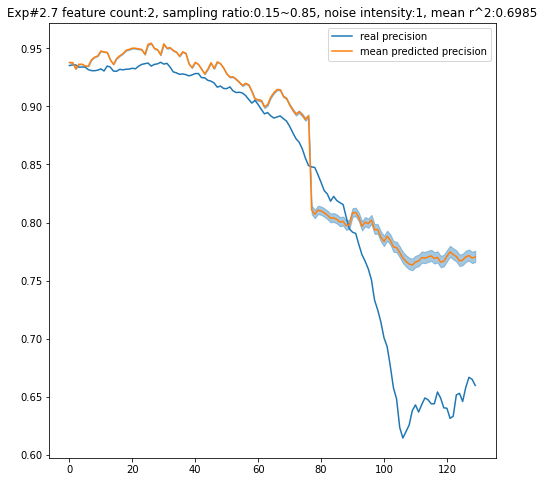

In [ ]:

seed_everything()

Exp = 2.7
top = 2
samplingsigma=0.85
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9952122721653924 delta_ratio:0.9428
MAE 0.042808246189998206
RMSE 0.06504027671387043
MAPE 0.0613939555470419
R2 0.6732307247053204
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9918998093327545 delta_ratio:0.9446
MAE 0.04057894840927838
RMSE 0.06050857067901397
MAPE 0.05788842330683393
R2 0.7171799186662656
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0084651180047934 delta_ratio:0.9415
MAE 0.04031614356735866
RMSE 0.05982848239836574
MAPE 0.057435099378686766
R2 0.7235017239823909
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0141594200829258 delta_ratio:0.9359
MAE 0.04186352980793228
RMSE 0.06273697873840345
MAPE 0.05981174856342461
R2 0.6959649487604825
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0215660029157776 delta_rat

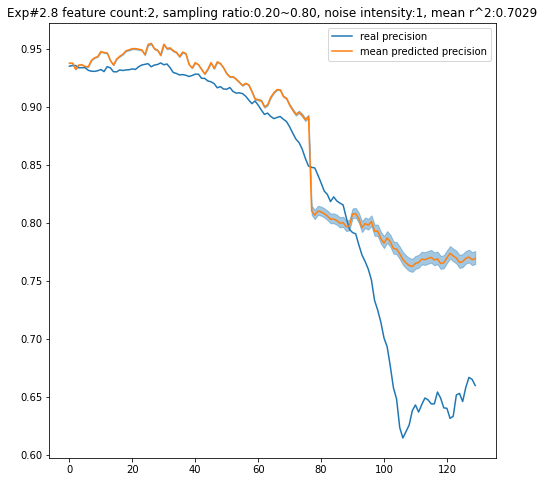

In [ ]:

seed_everything()

Exp = 2.8
top = 2
samplingsigma=0.80
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9959935744322848 delta_ratio:0.9421
MAE 0.04256552299427012
RMSE 0.06418141828222262
MAPE 0.06091797196253416
R2 0.681803737488754
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.991624391320102 delta_ratio:0.9449
MAE 0.040596580091598326
RMSE 0.06041301805140781
MAPE 0.057880519245060505
R2 0.7180724488932486
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0090285973679913 delta_ratio:0.9410
MAE 0.0396125005858883
RMSE 0.058237139875910324
MAPE 0.05628015359443665
R2 0.7380149374310306
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.014425806738567 delta_ratio:0.9356
MAE 0.04191745929499108
RMSE 0.06267496162378229
MAPE 0.059850409935859696
R2 0.6965657445746434
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0238263774223748 delta_rati

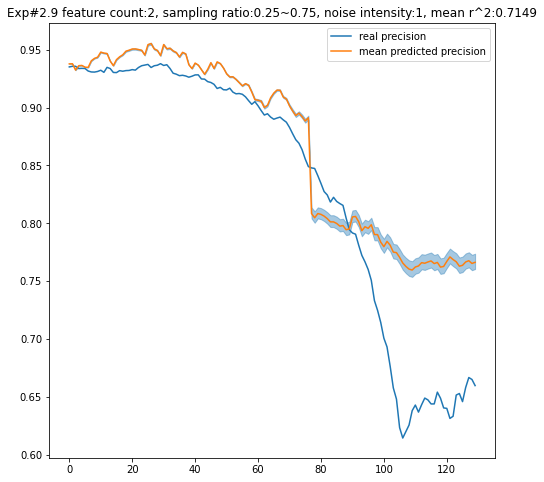

In [ ]:
seed_everything()

Exp = 2.9
top = 2
samplingsigma=0.75
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9972698822133037 delta_ratio:0.9409
MAE 0.042340431784364294
RMSE 0.06324793685926101
MAPE 0.0604378287482078
R2 0.6909923855825977
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9922855197971545 delta_ratio:0.9443
MAE 0.04070283955177237
RMSE 0.06031465225833636
MAPE 0.05796270213998555
R2 0.7189897826435382
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0090351113351805 delta_ratio:0.9410
MAE 0.03967500363267729
RMSE 0.058264219502967514
MAPE 0.056351653879124
R2 0.7377712404628651
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0147473561568845 delta_ratio:0.9353
MAE 0.042003215818676505
RMSE 0.06274500517240483
MAPE 0.05995716433995147
R2 0.6958871486041336
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0244853623022978 delta_rati

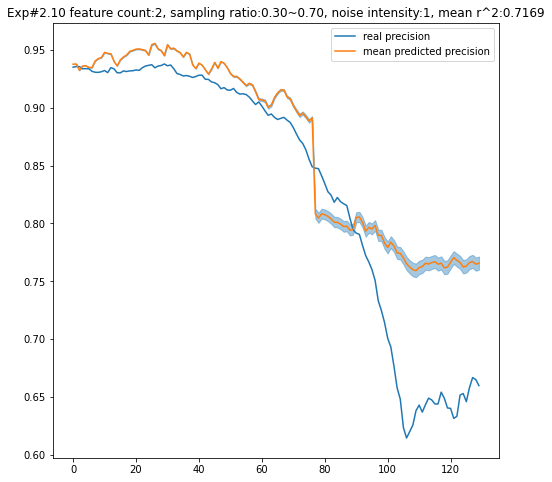

In [ ]:
seed_everything()

Exp = '2.10'
top = 2
samplingsigma=0.70
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9973531591543345 delta_ratio:0.9408
MAE 0.04241584342706757
RMSE 0.06332604023149482
MAPE 0.06053596404167467
R2 0.6902287420706134
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9924732798016822 delta_ratio:0.9441
MAE 0.04072669059911566
RMSE 0.06029930980090727
MAPE 0.05798293130747286
R2 0.7191327276422703
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0088753397307333 delta_ratio:0.9411
MAE 0.039736103278294334
RMSE 0.0582839577151377
MAPE 0.056419638880936686
R2 0.737593539511465
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.015342901867072 delta_ratio:0.9348
MAE 0.04190022826797148
RMSE 0.06230438807986728
MAPE 0.059732490898886645
R2 0.7001433226945352
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0254195553365382 delta_rati

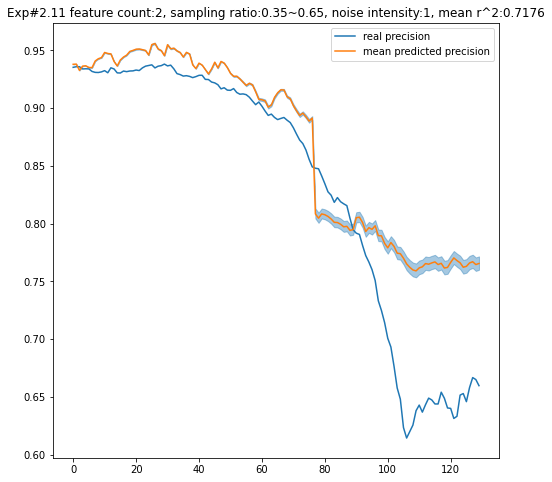

In [ ]:
seed_everything()

Exp = '2.11'
top = 2
samplingsigma=0.65
permutaionsigma=1

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9926205491923675 delta_ratio:0.9453
MAE 0.042188162115946386
RMSE 0.06290021520599864
MAPE 0.060188309410605406
R2 0.6943807419698124
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9883689065212514 delta_ratio:0.9480
MAE 0.04057743581970844
RMSE 0.059831326587859814
MAPE 0.05770348743784319
R2 0.7234754344242096
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.0035176153507488 delta_ratio:0.9462
MAE 0.03958595297915213
RMSE 0.05791897312942091
MAPE 0.05616513371516058
R2 0.7408697218113303
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0089973041102205 delta_ratio:0.9406
MAE 0.041699069496063126
RMSE 0.06189688690621262
MAPE 0.05941593840620288
R2 0.704052914109502
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.018250135887153 delta_ra

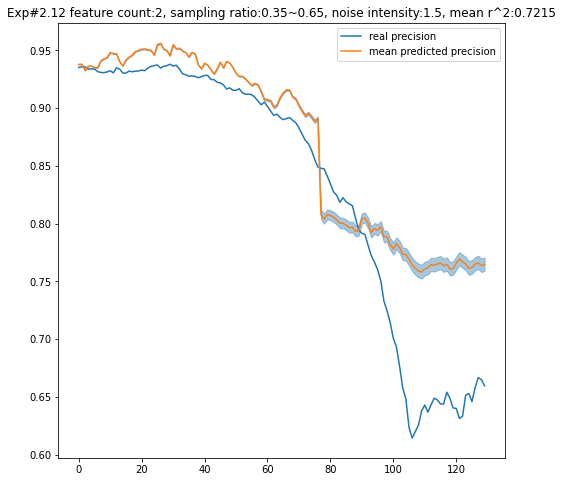

In [ ]:
seed_everything()

Exp = '2.12'
top = 2
samplingsigma=0.65
permutaionsigma=1.5

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.990620276079283 delta_ratio:0.9472
MAE 0.041977382517376094
RMSE 0.062351184824969916
MAPE 0.05982402303233218
R2 0.6996927096075547
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9865053702236756 delta_ratio:0.9498
MAE 0.04052872809617394
RMSE 0.05956987473896774
MAPE 0.05758245063657228
R2 0.7258868766870292
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:1.001019707996001 delta_ratio:0.9485
MAE 0.03958538196413394
RMSE 0.057808274647673866
MAPE 0.056133797112121485
R2 0.7418593082696441
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0063096883097473 delta_ratio:0.9432
MAE 0.040857607401206295
RMSE 0.060181303117511575
MAPE 0.0580845821704816
R2 0.7202309751520105
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.015700439002385 delta_ra

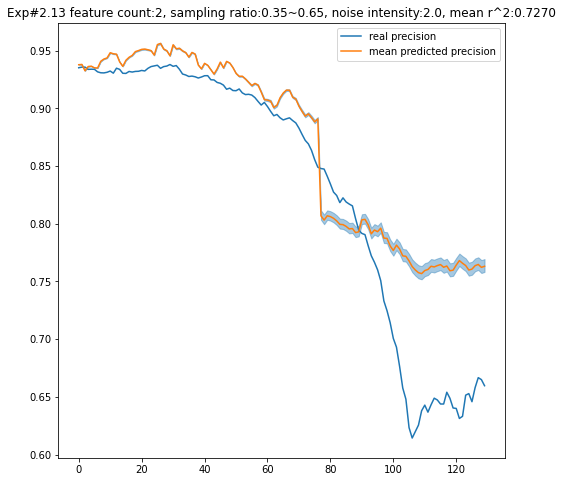

In [ ]:
seed_everything()

Exp = '2.13'
top = 2
samplingsigma=0.65
permutaionsigma=2.0

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.9893669771943419 delta_ratio:0.9484
MAE 0.04200439357895427
RMSE 0.062209252644367115
MAPE 0.059812814918893405
R2 0.7010583534610937
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.9852660633596975 delta_ratio:0.9510
MAE 0.04052486059136698
RMSE 0.05933991144553633
MAPE 0.05751538088490002
R2 0.7279991619659514
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:0.9994264408150763 delta_ratio:0.9500
MAE 0.03981496351622668
RMSE 0.05805023037392291
MAPE 0.05643534917879428
R2 0.739693897564642
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0045616371972583 delta_ratio:0.9448
MAE 0.04085643926070068
RMSE 0.06006650945587051
MAPE 0.058052096323415736
R2 0.7212972558516604
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0136769977428979 delta_ra

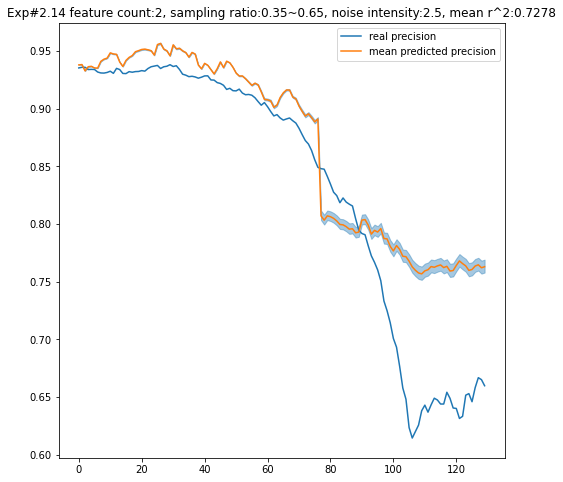

In [ ]:

seed_everything()

Exp = '2.14'
top = 2
samplingsigma=0.65
permutaionsigma=2.5

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



Trial 0
1000/1000 drift1:-0.016208261916169253 real_acc:0.9383259911894273 predict_acc:0.988192089787593 delta_ratio:0.9495
MAE 0.04196332422848565
RMSE 0.06210021664128438
MAPE 0.05974111420579209
R2 0.7021053628831595
Trial 1
1000/1000 drift1:-0.014579658795350003 real_acc:0.9369747899159664 predict_acc:0.98370351908644 delta_ratio:0.9525
MAE 0.04011564006101609
RMSE 0.058395568641868116
MAPE 0.05683754622999134
R2 0.7365875861966831
Trial 2
1000/1000 drift1:-0.019221451053295813 real_acc:0.9494949494949495 predict_acc:0.9975134752515978 delta_ratio:0.9519
MAE 0.06036898695391255
RMSE 0.09142510635592462
MAPE 0.08678732235556541
R2 0.3543347653044432
Trial 3
1000/1000 drift1:-0.020438747170538285 real_acc:0.9491017964071856 predict_acc:1.0027705651943313 delta_ratio:0.9465
MAE 0.04087840153023632
RMSE 0.059954612278471424
MAPE 0.05804381504274381
R2 0.7223346726293917
Trial 4
1000/1000 drift1:-0.023834421827908903 real_acc:0.9354838709677419 predict_acc:1.0119338190949754 delta_ratio

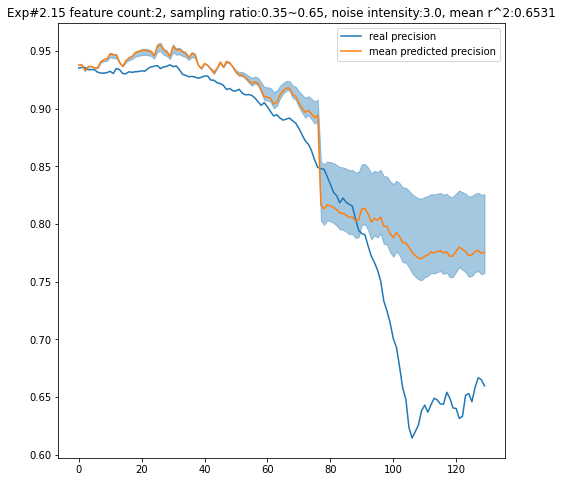

In [ ]:

seed_everything()

Exp = '2.15'
top = 2
samplingsigma=0.65
permutaionsigma=3.0

df3 = {}
result_data = {}
result_data['MAE'] = []
result_data['RMSE'] = []
result_data['MAPE'] = []
result_data['r_2'] = []
#result_dfs = []
experimant_count = 5
for trial in range(experimant_count):
    print(f'Trial {trial}')
    
    mpp1 = MPP(cat.predict,COLUMNS, cat.feature_importances_,y_ref,x_ref,y_inf,x_inf,scaler=None,verbose=False)
    metric_b,metric_c,drift_data_ks_stats,drift_data_ks_pvals_diff,length = mpp1.drift_sampling(sampling_sigma=samplingsigma,permutaion_sigma=permutaionsigma,epoch = 1000,TOP=top)
    mpp1.build_performance_model(metric_b,drift_data_ks_stats,drift_data_ks_pvals_diff)
    mdr,dist_ratio = mpp1.getMDR()
    df2 = mpp1.predict_precision_for_PPM(y_test2.values,X_test2.values,mdr,dist_ratio,window_size = length,step = 500)
    MAE,RMSE,MAPE,r_2 = mpp1.result_statistics(df2)
    result_data['MAE'].append(MAE)
    result_data['RMSE'].append(RMSE)
    result_data['MAPE'].append(MAPE)
    result_data['r_2'].append(r_2)
    #result_dfs.append(df2)
    df3['real precision'] = df2['The precision of the model on real data'].values
    df3[f'predicted precision {trial}'] = df2['Predicted precision'].values
    #df2.plot(title=f'Exp#{Exp}-{trial} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, R^2:{r_2:.4f}', figsize=(8,8))
    #plt.show()
    
for key, value in result_data.items():
    mean = np.mean(value)
    error_rate = 1.96 * np.std(value) / math.sqrt(experimant_count)
    print(f'{key}:{mean:.4f} +- {error_rate:.4f}')

df4 = pd.DataFrame(df3)
colums = []
for trial in range(experimant_count):
    colums.append(f'predicted precision {trial}')

df4['max predicted precision'] = df4[colums].max(axis=1)
df4['mean predicted precision'] = df4[colums].mean(axis=1)
df4['min predicted precision'] = df4[colums].min(axis=1)

erdic["Exp#"+str(Exp)] = abs(df4['real precision'] - df4['mean predicted precision']).values

mean_r_2 = np.mean(result_data['r_2'])
df4[['real precision','mean predicted precision']].plot(title=f'Exp#{Exp} feature count:{top}, sampling ratio:{1-samplingsigma:.2f}~{samplingsigma:.2f}, noise intensity:{permutaionsigma}, mean r^2:{mean_r_2:.4f}', figsize=(8,8))
plt.fill_between(df4.index, df4['max predicted precision'].values, df4['min predicted precision'].values, alpha=0.40, color='tab:blue')
plt.show()



### Error chart

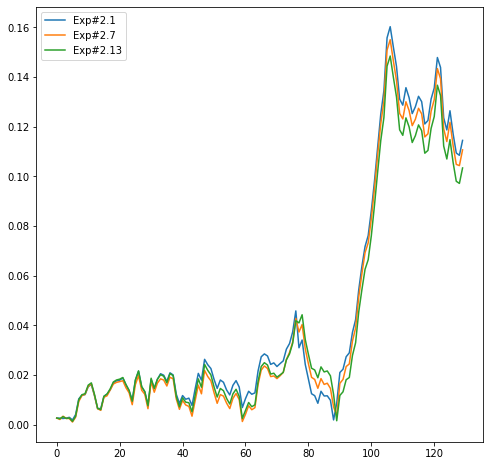

In [ ]:
error_df = pd.DataFrame(erdic)
error_df[['Exp#2.1','Exp#2.7','Exp#2.13']].plot(legend=True, figsize=(8,8))
#error_df.plot(legend=True, figsize=(20,5))